# Krypton Lifetime maps

### Author:  JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Fri Jan 25 13:39:02 2019


### Logger

In [2]:
import logging


logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')


2019-01-25 13:39:02,864 | INFO : Hello world!


### Input files

In [3]:
from krcal.core.kr_types import KrFileName

run_number = 6817
# run_number = 6340 # for testing only
t_start = time.time()

lifetime_limits = (2350, 5150)
e0_limits = (7000, 14000)
e0_limits_rphi = (12000, 14000)

input_path  = f"$IC_DATA/dst"
output_path = f"$IC_DATA/ldst"
output_plots = f"$IC_DATA/plots"
output_plots = os.path.expandvars(f"{output_plots}/")
summary_outputs = "/Users/jmhaefner/Development/KryptonCalibration/KrCalibNB_JMH/KrCalibNB/doc/img/r"+str(run_number)+"/"
map_path    = f"$IC_DATA/maps"

# Find the name of the correct input dst

dst_directory = os.path.expandvars(f"{input_path}/")
dirlist = os.listdir(dst_directory)
dst_file = ""
for file_name in dirlist:
    try:
        check_number = file_name
        check_number = check_number[check_number.find('_')+1:]
        check_number = check_number[:check_number.find('_')]
        if check_number == str(run_number):
            print('Found the dst:',file_name)
            dst_file = file_name
    except:
        pass

if dst_file == "":
    raise ValueError("Unable to find appropriate dst for run "+str(run_number))

input_file_names  = [ dst_file ]

    
time_bins = 25
output_file_name  = ' '
map_file_name     = 'kr_maps_xy_'+str(run_number)+'.h5'
map_file_name_ts  = f'kr_maps_rphi_5_8_ts_{time_bins}_'+str(run_number)+'.h5'
emap_file_name    = 'kr_emap_xy_50_50_r_'+str(run_number)+'.h5'


krfn = KrFileName(input_file_names,
                  output_file_name,
                  map_file_name,
                  map_file_name_ts,
                  emap_file_name)

Found the dst: dst_6817_trigger1_0000_11864.h5


### Notebook configuration

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import tables            as tb
import random
import glob
import warnings
sns.set()

In [6]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
import invisible_cities.reco.corrections      as corrf

In [7]:
from krcal.core.io_functions       import kdst_write
from krcal.core.io_functions       import filenames_from_list
from krcal.core.io_functions       import write_maps
from krcal.core.io_functions       import read_maps
from krcal.core.io_functions       import write_maps_ts
from krcal.core.io_functions       import read_maps_ts

In [8]:
from krcal.core.histo_functions    import h1, h1d, h2, h2d, plot_histo

In [9]:
from krcal.core.core_functions      import time_delta_from_time
from krcal.core.core_functions      import phirad_to_deg
from krcal.core.core_functions      import timeit
from krcal.core.core_functions      import NN
from krcal.core                     import fit_functions_ic as fitf

In [10]:
from krcal.core.plt_functions  import plot_sector
from krcal.core.plt_functions  import plot_sectors

In [11]:
from krcal.core.stat_functions      import mean_and_std

In [12]:
from krcal.core.analysis_functions  import kr_ranges_and_bins
from krcal.core.analysis_functions  import fiducial_volumes
from krcal.core.analysis_functions  import fid_eff
from krcal.core.analysis_functions  import select_rphi_sectors
from krcal.core.analysis_functions  import select_xy_sectors
from krcal.core.analysis_functions  import event_map

from krcal.core.analysis_functions  import kr_event_selection
from krcal.core.analysis_functions  import kr_event

In [13]:
from krcal.core.fit_lt_functions    import fit_lifetime
from krcal.core.fit_lt_functions    import time_fcs
from krcal.core.fit_lt_functions    import fit_fcs_in_rphi_sectors
from krcal.core.fit_lt_functions    import fit_fcs_in_xy_bin
from krcal.core.fit_lt_functions    import fit_map_rphi
from krcal.core.fit_lt_functions    import fit_map_xy
from krcal.core.fit_lt_functions    import get_time_series

In [14]:
from krcal.core.fit_lt_histograms   import histo_fit_sectors
from krcal.core.fit_lt_histograms   import print_fit_sectors_pars
from krcal.core.fit_lt_histograms   import plot_fit_sectors
from krcal.core.fit_lt_histograms   import plot_fit_xy
from krcal.core.fit_lt_histograms   import plot_time_fcs
from krcal.core.fit_lt_histograms   import plot_fit_lifetime_and_chi2
from krcal.core.fit_lt_histograms   import print_fit_lifetime

In [15]:
from krcal.core.fit_energy_functions    import fit_energy
from krcal.core.fit_energy_functions    import plot_fit_energy
from krcal.core.fit_energy_functions    import print_fit_energy
from krcal.core.fit_energy_functions    import resolution_r_z
from krcal.core.fit_energy_functions    import plot_resolution_r_z

In [16]:
from krcal.core.kr_types import PlotLabels, KrEvent, ASectorMap
from krcal.core.kr_types import FitType, KrSector, MapType
from krcal.core.kr_types import KrFileName

In [17]:
from krcal.core.rphi_maps_functions   import draw_rphi_maps
from krcal.core.rphi_maps_functions   import draw_rphi_map
from krcal.core.rphi_maps_functions   import draw_rphi_maps_ts
from krcal.core.rphi_maps_functions   import draw_wedges
from krcal.core.rphi_maps_functions   import define_rphi_sectors
from krcal.core.rphi_maps_functions   import rphi_sector_map_def

In [18]:
from krcal.core.map_functions   import tsmap_from_fmap
from krcal.core.map_functions   import amap_from_tsmap
from krcal.core.map_functions   import relative_errors
from krcal.core.map_functions   import amap_valid_mask
from krcal.core.map_functions   import amap_valid_fraction
from krcal.core.map_functions   import amap_average
from krcal.core.map_functions   import amap_max
from krcal.core.map_functions   import amap_min
from krcal.core.map_functions   import amap_replace_nan_by_mean
from krcal.core.map_functions   import amap_replace_nan_by_zero
from krcal.core.map_functions   import regularize_maps
from krcal.core.map_functions   import get_maps_from_tsmap
from krcal.core.map_functions   import map_average

In [19]:
from krcal.core.xy_maps_functions   import draw_xy_maps
from krcal.core.xy_maps_functions   import draw_xy_map
from krcal.core.xy_maps_functions   import draw_xy_maps_ts

In [20]:
from krcal.core.s1s2_functions  import energy_time_profile
from krcal.core.s1s2_functions  import energy_X_profile

In [21]:
from krcal.core.correction_functions import e0_rphi_correction
from krcal.core.correction_functions import e0_xy_correction
from krcal.core.correction_functions import lt_xy_correction
from krcal.core.correction_functions import e0_xy_correction_ts
from krcal.core.correction_functions import lt_xy_correction_ts
from krcal.core.correction_functions import lt_rphi_correction
from krcal.core.correction_functions import lt_rphi_correction_ts
from krcal.core.correction_functions import e0_rphi_correction_ts

In [22]:
from numpy import pi, sqrt

In [23]:
from typing      import List, Tuple, Dict, Sequence, Iterable

In [24]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display

### Logger


- CRITICAL
- ERROR
- WARNING
- INFO
- DEBUG



In [25]:
log = logging.getLogger()

### Input/output 

In [26]:
fn =filenames_from_list(krfn, input_path, output_path, map_path)

In [27]:
t0 = time.time()
dst           = load_dsts(fn.input_file_names, "DST", "Events")
t1 = time.time()
print(f'Read in file time: t = {t1 -t0}')

Read in file time: t = 2.311434268951416


In [28]:
unique_events = ~dst.event.duplicated()
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of events: {len(dst)}")

Total number of events: 870072


In [29]:
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

### Time differences in seconds

In [30]:
dst_time = dst.sort_values('time')
T       = dst_time.time.values
DT      = time_delta_from_time(T)

### Ranges and binning

In [31]:
RMAX      = 200
RCORE     = 100
s1e_range = (3, 25)
s2e_range = (2000, 14000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (10,  550)
e_range = (5000, 14000)
lt_range = (1000, 6000)
c2_range = (0,5)

krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 100,
                                                        ynbins    = 100,
                                                        znbins    = 15,
                                                        s2enbins  = 25,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

In [32]:
dst = dst[in_range(dst.R, 0, RMAX)]

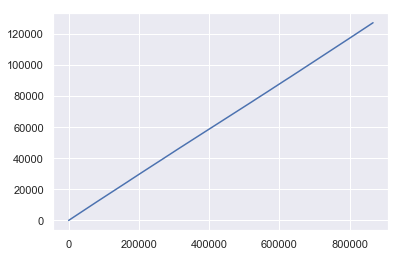

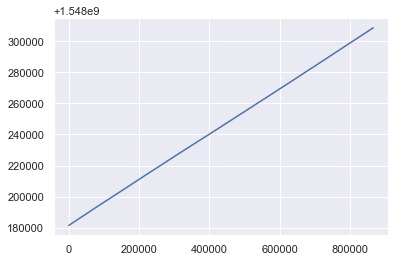

In [33]:
dst_time = dst.sort_values('time')
T       = dst_time.time.values
DT      = time_delta_from_time(T)
plt.plot(DT)
plt.show()
plt.plot(T)
plt.show()

In [34]:
kge = kr_event(dst, DT, dst.S2e, dst.S2q)

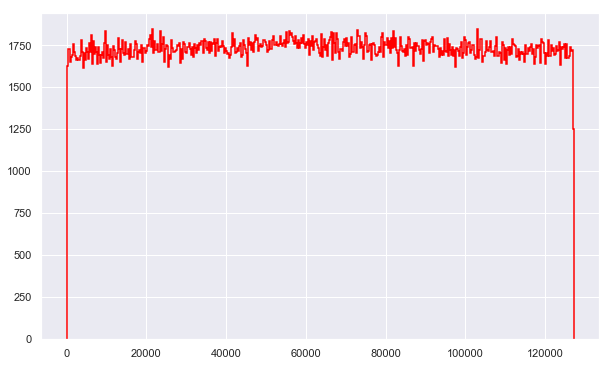

In [35]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(kge.DT, bins=500, range = (kge.DT[0], kge.DT[-1]), color='red', stats=False, lbl='pre-sel')

### Time 

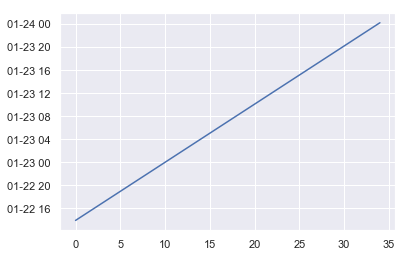

In [36]:
plt.plot(krTimes.timeStamps)

### Event distribution

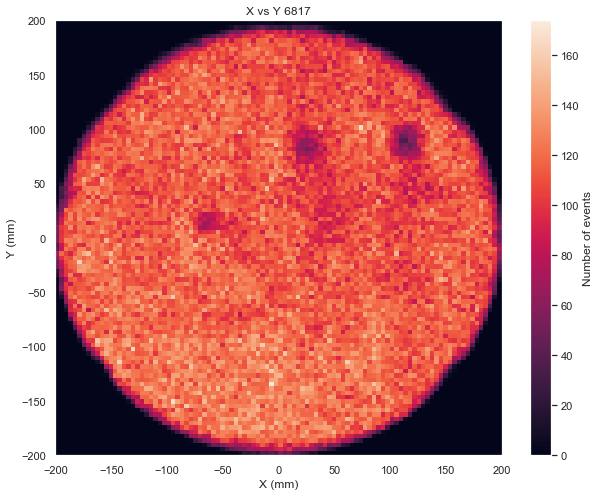

In [37]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y '+str(run_number)),
           profile=False,
           figsize=(10,8))
plt.savefig(output_plots+'/EventDists/EventDist_'+str(run_number)+'.png')

## Time series

In [38]:
log.setLevel(logging.INFO)

### Divide dst in 100 time series

In [39]:
time_bins = 25
t0 = time.time()

ts, masks = get_time_series(time_bins, (DT[0],DT[-1]), kge)
t1 = time.time()
print(f' get_time_series: t = {t1 -t0}')

 get_time_series: t = 0.05618715286254883


### Fit lifetime full detector

In [40]:
t0 = time.time()
fps = time_fcs(ts, masks, kge, 
               nbins_z = 15,
               nbins_e = 25,
               range_z = (10, 550),
               range_e = (7000, 14000),
               energy  = 'S2e',
               fit     = FitType.profile) # lifetime fit parameter time series
t1 = time.time()
print(f' time_fcs: t = {t1 -t0}')

 time_fcs: t = 0.37660908699035645


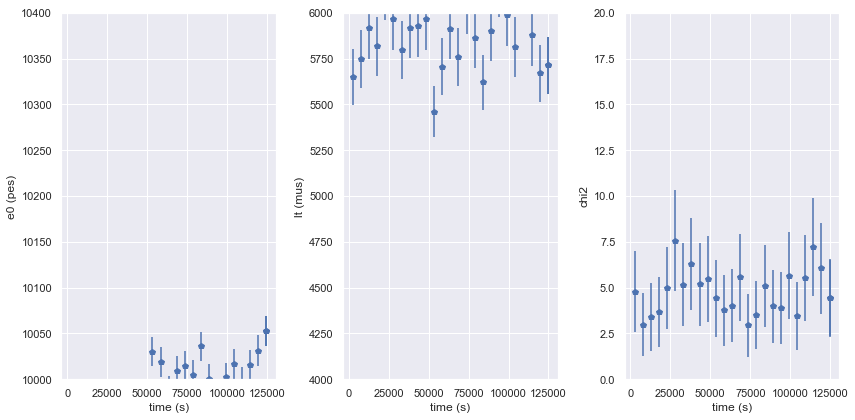

In [41]:
plot_time_fcs(fps,
              range_chi2  = (0,20),
              range_e0    = (10000,10400),
              range_lt    = (4000, 6000),
              figsize     = (12,6))

## Lifetime in RPhi

In [42]:
NSECTORS =5  # number of sectors in R. Each sector then is 200 / 5 = 40 cm.
SPHI     =45 # size of the phi pie-slice in degrees, thus 10 slices in phi.
#NSECTORS =4  # number of sectors in R. Each sector then is 200 / 5 = 40 cm.
#SPHI     =45 # size of the phi pie-slice in degrees, thus 10 slices in phi.

In [43]:
rpsmd = rphi_sector_map_def(nSectors=NSECTORS, rmax=RMAX, sphi=SPHI)

In [44]:
W = define_rphi_sectors(rpsmd)

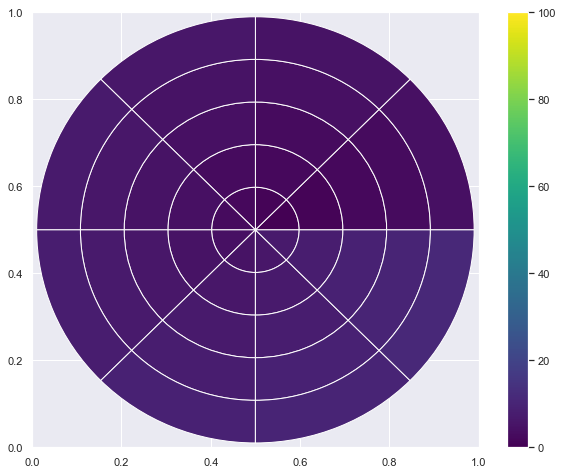

In [45]:
draw_wedges(W,  rmax = RMAX, 
            scale= 0.49, figsize=(10,8), alpha=1.0,
            cr =range(NSECTORS))

In [46]:
t0 = time.time()
KSRP = select_rphi_sectors(dst, DT, dst.S2e, dst.S2q, W)
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

 KRES: t = 1.6260740756988525


In [47]:
neM = event_map(KSRP)

In [48]:
neM

,0,1,2,3,4
0,4280,14194,23225,33142,39349
1,4467,13804,24116,34973,39557
2,4606,13594,23467,34184,38930
3,4268,13305,22371,31616,37577
4,4252,12106,21380,27538,35748
5,4375,12289,20308,30554,31855
6,4576,13627,22997,31900,32128
7,4385,12442,22690,31385,34844


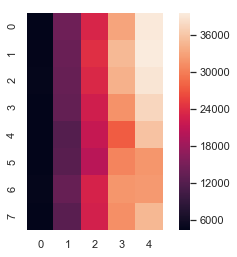

In [49]:
ax = sns.heatmap(neM, square=True)

### four phi sectors: upper half (left-right), lower half (left-right) of chamber

### R < 40 mm

In [50]:
erange = (0,14500)
ltrange = (0, 7000)

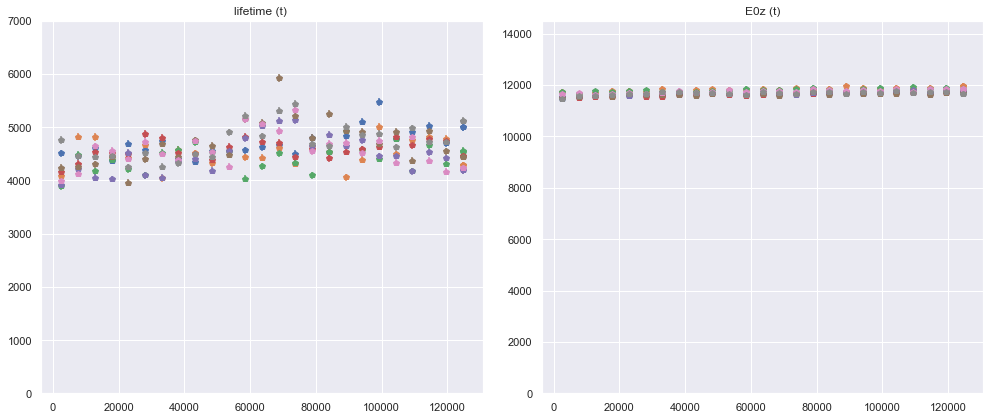

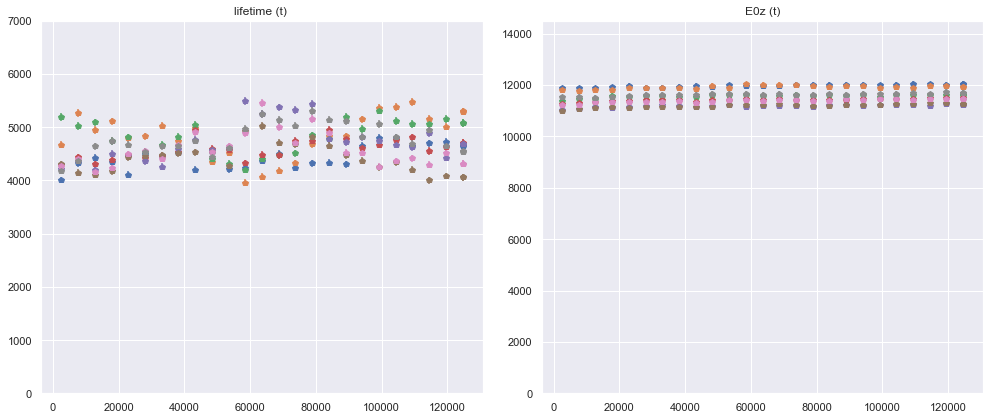

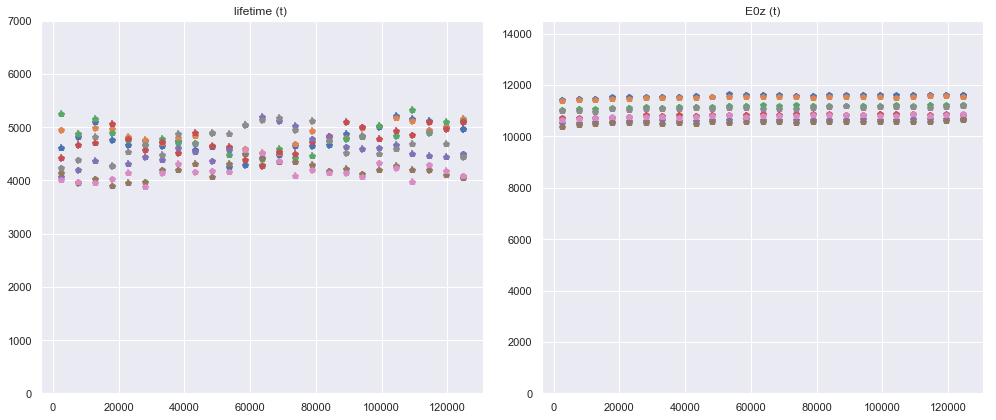

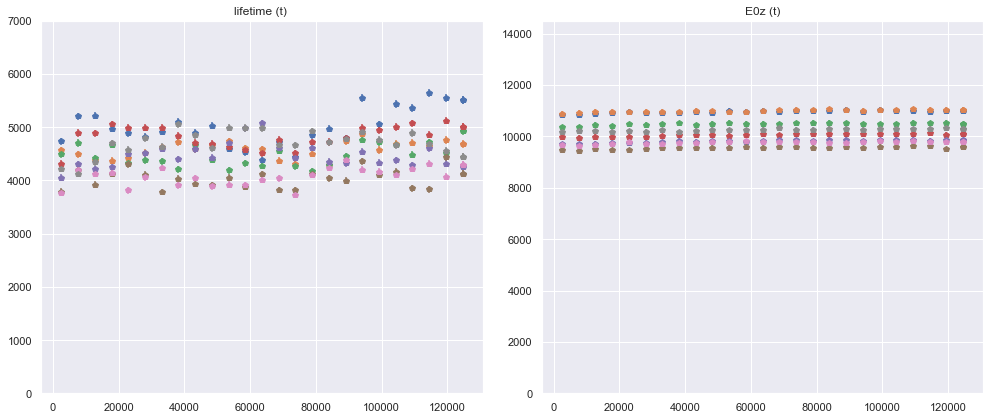

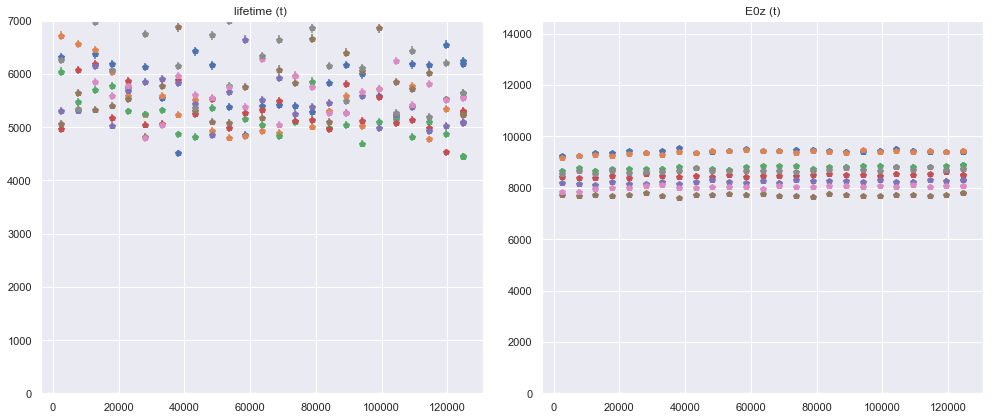

In [51]:
for sector in range(NSECTORS):
    fps = fit_fcs_in_rphi_sectors(sector = sector,
                              selection_map = KSRP,
                              event_map     = neM,
                              n_time_bins   = time_bins,
                              time_diffs    = DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 14500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)
    plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)
    plt.savefig(summary_outputs+'R_phi_lt'+str(sector+1)+'.png')

### Lifetime patterns:

- Oscillatory pattern in time with a swing of 1 ms!
- Lifetime changes also as a function of Phi, with differences that increase as R increases.
- R > 160 cm data shows very high and very variable lifetime, with a spread of several ms.

### Strategy

- Try to correct geometrical effects first. Fine grained geometrical map with a single time bin.
- Study time dependence later

## Divide chamber in sectors of XY

In [52]:
log.setLevel(logging.DEBUG)

In [53]:
t0 = time.time()
print(len(dst))
print(len(DT))
KRES = select_xy_sectors(dst, DT, dst.S2e.values, dst.S2q.values, krBins.X, krBins.Y)
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

866404
866404
2019-01-25 13:39:30,835 | DEBUG :  function: select_xy_sectors


2019-01-25 13:39:30,836 | DEBUG :  calling selection_mask


2019-01-25 13:39:30,837 | DEBUG : computing selection mask for sector 0


2019-01-25 13:39:31,150 | DEBUG : computing selection mask for sector 1


2019-01-25 13:39:31,454 | DEBUG : computing selection mask for sector 2


2019-01-25 13:39:31,719 | DEBUG : computing selection mask for sector 3


2019-01-25 13:39:31,967 | DEBUG : computing selection mask for sector 4


2019-01-25 13:39:32,216 | DEBUG : computing selection mask for sector 5


2019-01-25 13:39:32,456 | DEBUG : computing selection mask for sector 6


2019-01-25 13:39:32,684 | DEBUG : computing selection mask for sector 7


2019-01-25 13:39:32,919 | DEBUG : computing selection mask for sector 8


2019-01-25 13:39:33,179 | DEBUG : computing selection mask for sector 9


2019-01-25 13:39:33,421 | DEBUG : computing selection mask for sector 10


2019-01-25 13:39:33,651 | DEBUG : computing selection mask for sector 11


2019-01-25 13:39:33,888 | DEBUG : computing selection mask for sector 12


2019-01-25 13:39:34,127 | DEBUG : computing selection mask for sector 13


2019-01-25 13:39:34,364 | DEBUG : computing selection mask for sector 14


2019-01-25 13:39:34,612 | DEBUG : computing selection mask for sector 15


2019-01-25 13:39:34,852 | DEBUG : computing selection mask for sector 16


2019-01-25 13:39:35,104 | DEBUG : computing selection mask for sector 17


2019-01-25 13:39:35,345 | DEBUG : computing selection mask for sector 18


2019-01-25 13:39:35,586 | DEBUG : computing selection mask for sector 19


2019-01-25 13:39:35,820 | DEBUG : computing selection mask for sector 20


2019-01-25 13:39:36,111 | DEBUG : computing selection mask for sector 21


2019-01-25 13:39:36,405 | DEBUG : computing selection mask for sector 22


2019-01-25 13:39:36,691 | DEBUG : computing selection mask for sector 23


2019-01-25 13:39:36,970 | DEBUG : computing selection mask for sector 24


2019-01-25 13:39:37,223 | DEBUG : computing selection mask for sector 25


2019-01-25 13:39:37,520 | DEBUG : computing selection mask for sector 26


2019-01-25 13:39:37,826 | DEBUG : computing selection mask for sector 27


2019-01-25 13:39:38,098 | DEBUG : computing selection mask for sector 28


2019-01-25 13:39:38,371 | DEBUG : computing selection mask for sector 29


2019-01-25 13:39:38,652 | DEBUG : computing selection mask for sector 30


2019-01-25 13:39:38,924 | DEBUG : computing selection mask for sector 31


2019-01-25 13:39:39,197 | DEBUG : computing selection mask for sector 32


2019-01-25 13:39:39,462 | DEBUG : computing selection mask for sector 33


2019-01-25 13:39:39,734 | DEBUG : computing selection mask for sector 34


2019-01-25 13:39:40,012 | DEBUG : computing selection mask for sector 35


2019-01-25 13:39:40,322 | DEBUG : computing selection mask for sector 36


2019-01-25 13:39:40,607 | DEBUG : computing selection mask for sector 37


2019-01-25 13:39:40,890 | DEBUG : computing selection mask for sector 38


2019-01-25 13:39:41,211 | DEBUG : computing selection mask for sector 39


2019-01-25 13:39:41,484 | DEBUG : computing selection mask for sector 40


2019-01-25 13:39:41,762 | DEBUG : computing selection mask for sector 41


2019-01-25 13:39:42,058 | DEBUG : computing selection mask for sector 42


2019-01-25 13:39:42,376 | DEBUG : computing selection mask for sector 43


2019-01-25 13:39:42,662 | DEBUG : computing selection mask for sector 44


2019-01-25 13:39:42,978 | DEBUG : computing selection mask for sector 45


2019-01-25 13:39:43,365 | DEBUG : computing selection mask for sector 46


2019-01-25 13:39:43,659 | DEBUG : computing selection mask for sector 47


2019-01-25 13:39:43,966 | DEBUG : computing selection mask for sector 48


2019-01-25 13:39:44,264 | DEBUG : computing selection mask for sector 49


2019-01-25 13:39:44,549 | DEBUG : computing selection mask for sector 50


2019-01-25 13:39:44,834 | DEBUG : computing selection mask for sector 51


2019-01-25 13:39:45,120 | DEBUG : computing selection mask for sector 52


2019-01-25 13:39:45,412 | DEBUG : computing selection mask for sector 53


2019-01-25 13:39:45,687 | DEBUG : computing selection mask for sector 54


2019-01-25 13:39:45,959 | DEBUG : computing selection mask for sector 55


2019-01-25 13:39:46,293 | DEBUG : computing selection mask for sector 56


2019-01-25 13:39:46,569 | DEBUG : computing selection mask for sector 57


2019-01-25 13:39:46,847 | DEBUG : computing selection mask for sector 58


2019-01-25 13:39:47,134 | DEBUG : computing selection mask for sector 59


2019-01-25 13:39:47,406 | DEBUG : computing selection mask for sector 60


2019-01-25 13:39:47,689 | DEBUG : computing selection mask for sector 61


2019-01-25 13:39:47,986 | DEBUG : computing selection mask for sector 62


2019-01-25 13:39:48,296 | DEBUG : computing selection mask for sector 63


2019-01-25 13:39:48,599 | DEBUG : computing selection mask for sector 64


2019-01-25 13:39:48,907 | DEBUG : computing selection mask for sector 65


2019-01-25 13:39:49,239 | DEBUG : computing selection mask for sector 66


2019-01-25 13:39:49,515 | DEBUG : computing selection mask for sector 67


2019-01-25 13:39:49,789 | DEBUG : computing selection mask for sector 68


2019-01-25 13:39:50,078 | DEBUG : computing selection mask for sector 69


2019-01-25 13:39:50,380 | DEBUG : computing selection mask for sector 70


2019-01-25 13:39:50,663 | DEBUG : computing selection mask for sector 71


2019-01-25 13:39:50,947 | DEBUG : computing selection mask for sector 72


2019-01-25 13:39:51,293 | DEBUG : computing selection mask for sector 73


2019-01-25 13:39:51,571 | DEBUG : computing selection mask for sector 74


2019-01-25 13:39:51,854 | DEBUG : computing selection mask for sector 75


2019-01-25 13:39:52,147 | DEBUG : computing selection mask for sector 76


2019-01-25 13:39:52,457 | DEBUG : computing selection mask for sector 77


2019-01-25 13:39:52,741 | DEBUG : computing selection mask for sector 78


2019-01-25 13:39:53,035 | DEBUG : computing selection mask for sector 79


2019-01-25 13:39:53,315 | DEBUG : computing selection mask for sector 80


2019-01-25 13:39:53,600 | DEBUG : computing selection mask for sector 81


2019-01-25 13:39:53,879 | DEBUG : computing selection mask for sector 82


2019-01-25 13:39:54,157 | DEBUG : computing selection mask for sector 83


2019-01-25 13:39:54,445 | DEBUG : computing selection mask for sector 84


2019-01-25 13:39:54,749 | DEBUG : computing selection mask for sector 85


2019-01-25 13:39:55,041 | DEBUG : computing selection mask for sector 86


2019-01-25 13:39:55,376 | DEBUG : computing selection mask for sector 87


2019-01-25 13:39:55,669 | DEBUG : computing selection mask for sector 88


2019-01-25 13:39:56,003 | DEBUG : computing selection mask for sector 89


2019-01-25 13:39:56,308 | DEBUG : computing selection mask for sector 90


2019-01-25 13:39:56,595 | DEBUG : computing selection mask for sector 91


2019-01-25 13:39:56,880 | DEBUG : computing selection mask for sector 92


2019-01-25 13:39:57,191 | DEBUG : computing selection mask for sector 93


2019-01-25 13:39:57,472 | DEBUG : computing selection mask for sector 94


2019-01-25 13:39:57,761 | DEBUG : computing selection mask for sector 95


2019-01-25 13:39:58,029 | DEBUG : computing selection mask for sector 96


2019-01-25 13:39:58,342 | DEBUG : computing selection mask for sector 97


2019-01-25 13:39:58,616 | DEBUG : computing selection mask for sector 98


2019-01-25 13:39:58,881 | DEBUG : computing selection mask for sector 99


2019-01-25 13:39:59,172 | DEBUG :  selection mask computed, filling selections


2019-01-25 13:39:59,173 | DEBUG :  defining kr_event for sector 0


2019-01-25 13:39:59,451 | DEBUG :  defining kr_event for sector 1


2019-01-25 13:39:59,771 | DEBUG :  defining kr_event for sector 2


2019-01-25 13:40:00,127 | DEBUG :  defining kr_event for sector 3


2019-01-25 13:40:00,438 | DEBUG :  defining kr_event for sector 4


2019-01-25 13:40:00,765 | DEBUG :  defining kr_event for sector 5


2019-01-25 13:40:01,112 | DEBUG :  defining kr_event for sector 6


2019-01-25 13:40:01,487 | DEBUG :  defining kr_event for sector 7


2019-01-25 13:40:01,814 | DEBUG :  defining kr_event for sector 8


2019-01-25 13:40:02,147 | DEBUG :  defining kr_event for sector 9


2019-01-25 13:40:02,496 | DEBUG :  defining kr_event for sector 10


2019-01-25 13:40:02,841 | DEBUG :  defining kr_event for sector 11


2019-01-25 13:40:03,260 | DEBUG :  defining kr_event for sector 12


2019-01-25 13:40:03,687 | DEBUG :  defining kr_event for sector 13


2019-01-25 13:40:04,036 | DEBUG :  defining kr_event for sector 14


2019-01-25 13:40:04,445 | DEBUG :  defining kr_event for sector 15


2019-01-25 13:40:05,037 | DEBUG :  defining kr_event for sector 16


2019-01-25 13:40:06,102 | DEBUG :  defining kr_event for sector 17


2019-01-25 13:40:06,998 | DEBUG :  defining kr_event for sector 18


2019-01-25 13:40:07,533 | DEBUG :  defining kr_event for sector 19


2019-01-25 13:40:07,975 | DEBUG :  defining kr_event for sector 20


2019-01-25 13:40:08,404 | DEBUG :  defining kr_event for sector 21


2019-01-25 13:40:08,839 | DEBUG :  defining kr_event for sector 22


2019-01-25 13:40:09,313 | DEBUG :  defining kr_event for sector 23


2019-01-25 13:40:09,732 | DEBUG :  defining kr_event for sector 24


2019-01-25 13:40:10,260 | DEBUG :  defining kr_event for sector 25


2019-01-25 13:40:10,729 | DEBUG :  defining kr_event for sector 26


2019-01-25 13:40:11,221 | DEBUG :  defining kr_event for sector 27


2019-01-25 13:40:11,685 | DEBUG :  defining kr_event for sector 28


2019-01-25 13:40:12,082 | DEBUG :  defining kr_event for sector 29


2019-01-25 13:40:12,505 | DEBUG :  defining kr_event for sector 30


2019-01-25 13:40:12,935 | DEBUG :  defining kr_event for sector 31


2019-01-25 13:40:13,389 | DEBUG :  defining kr_event for sector 32


2019-01-25 13:40:13,828 | DEBUG :  defining kr_event for sector 33


2019-01-25 13:40:14,267 | DEBUG :  defining kr_event for sector 34


2019-01-25 13:40:14,709 | DEBUG :  defining kr_event for sector 35


2019-01-25 13:40:15,186 | DEBUG :  defining kr_event for sector 36


2019-01-25 13:40:15,644 | DEBUG :  defining kr_event for sector 37


2019-01-25 13:40:16,095 | DEBUG :  defining kr_event for sector 38


2019-01-25 13:40:16,532 | DEBUG :  defining kr_event for sector 39


2019-01-25 13:40:16,982 | DEBUG :  defining kr_event for sector 40


2019-01-25 13:40:17,465 | DEBUG :  defining kr_event for sector 41


2019-01-25 13:40:17,887 | DEBUG :  defining kr_event for sector 42


2019-01-25 13:40:18,346 | DEBUG :  defining kr_event for sector 43


2019-01-25 13:40:18,847 | DEBUG :  defining kr_event for sector 44


2019-01-25 13:40:19,344 | DEBUG :  defining kr_event for sector 45


2019-01-25 13:40:19,915 | DEBUG :  defining kr_event for sector 46


2019-01-25 13:40:20,379 | DEBUG :  defining kr_event for sector 47


2019-01-25 13:40:20,832 | DEBUG :  defining kr_event for sector 48


2019-01-25 13:40:21,341 | DEBUG :  defining kr_event for sector 49


2019-01-25 13:40:21,805 | DEBUG :  defining kr_event for sector 50


2019-01-25 13:40:22,231 | DEBUG :  defining kr_event for sector 51


2019-01-25 13:40:22,679 | DEBUG :  defining kr_event for sector 52


2019-01-25 13:40:23,274 | DEBUG :  defining kr_event for sector 53


2019-01-25 13:40:23,930 | DEBUG :  defining kr_event for sector 54


2019-01-25 13:40:24,471 | DEBUG :  defining kr_event for sector 55


2019-01-25 13:40:24,899 | DEBUG :  defining kr_event for sector 56


2019-01-25 13:40:25,309 | DEBUG :  defining kr_event for sector 57


2019-01-25 13:40:25,709 | DEBUG :  defining kr_event for sector 58


2019-01-25 13:40:26,235 | DEBUG :  defining kr_event for sector 59


2019-01-25 13:40:26,630 | DEBUG :  defining kr_event for sector 60


2019-01-25 13:40:27,073 | DEBUG :  defining kr_event for sector 61


2019-01-25 13:40:27,494 | DEBUG :  defining kr_event for sector 62


2019-01-25 13:40:27,997 | DEBUG :  defining kr_event for sector 63


2019-01-25 13:40:28,458 | DEBUG :  defining kr_event for sector 64


2019-01-25 13:40:28,954 | DEBUG :  defining kr_event for sector 65


2019-01-25 13:40:29,466 | DEBUG :  defining kr_event for sector 66


2019-01-25 13:40:29,893 | DEBUG :  defining kr_event for sector 67


2019-01-25 13:40:30,348 | DEBUG :  defining kr_event for sector 68


2019-01-25 13:40:30,771 | DEBUG :  defining kr_event for sector 69


2019-01-25 13:40:31,241 | DEBUG :  defining kr_event for sector 70


2019-01-25 13:40:31,687 | DEBUG :  defining kr_event for sector 71


2019-01-25 13:40:32,114 | DEBUG :  defining kr_event for sector 72


2019-01-25 13:40:32,573 | DEBUG :  defining kr_event for sector 73


2019-01-25 13:40:32,998 | DEBUG :  defining kr_event for sector 74


2019-01-25 13:40:33,391 | DEBUG :  defining kr_event for sector 75


2019-01-25 13:40:33,796 | DEBUG :  defining kr_event for sector 76


2019-01-25 13:40:34,280 | DEBUG :  defining kr_event for sector 77


2019-01-25 13:40:34,699 | DEBUG :  defining kr_event for sector 78


2019-01-25 13:40:35,199 | DEBUG :  defining kr_event for sector 79


2019-01-25 13:40:35,669 | DEBUG :  defining kr_event for sector 80


2019-01-25 13:40:36,047 | DEBUG :  defining kr_event for sector 81


2019-01-25 13:40:36,518 | DEBUG :  defining kr_event for sector 82


2019-01-25 13:40:36,927 | DEBUG :  defining kr_event for sector 83


2019-01-25 13:40:37,476 | DEBUG :  defining kr_event for sector 84


2019-01-25 13:40:37,952 | DEBUG :  defining kr_event for sector 85


2019-01-25 13:40:38,433 | DEBUG :  defining kr_event for sector 86


2019-01-25 13:40:38,933 | DEBUG :  defining kr_event for sector 87


2019-01-25 13:40:39,396 | DEBUG :  defining kr_event for sector 88


2019-01-25 13:40:39,813 | DEBUG :  defining kr_event for sector 89


2019-01-25 13:40:40,228 | DEBUG :  defining kr_event for sector 90


2019-01-25 13:40:40,628 | DEBUG :  defining kr_event for sector 91


2019-01-25 13:40:41,036 | DEBUG :  defining kr_event for sector 92


2019-01-25 13:40:41,402 | DEBUG :  defining kr_event for sector 93


2019-01-25 13:40:41,723 | DEBUG :  defining kr_event for sector 94


2019-01-25 13:40:42,104 | DEBUG :  defining kr_event for sector 95


2019-01-25 13:40:42,467 | DEBUG :  defining kr_event for sector 96


2019-01-25 13:40:42,773 | DEBUG :  defining kr_event for sector 97


2019-01-25 13:40:43,089 | DEBUG :  defining kr_event for sector 98


2019-01-25 13:40:43,382 | DEBUG :  defining kr_event for sector 99


2019-01-25 13:40:43,623 | DEBUG :  RGES computed


 KRES: t = 73.54238080978394


In [54]:
log.setLevel(logging.INFO)

In [55]:
neM = event_map(KRES)

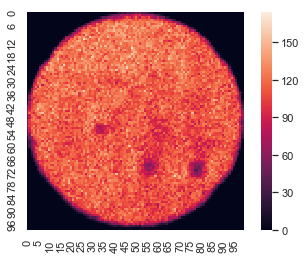

In [56]:
ax = sns.heatmap(neM, square=True)

## Fits in XY sectors

## Maps

#### fit maps. The object returned is a Dict[int, List[FitParTS]] where

```
@dataclass
class FitParTS:             # Fit parameters Time Series
    ts   : np.array          # contains the time series (integers expressing time differences)
    e0   : np.array          # e0 fitted in time series
    lt   : np.array
    c2   : np.array
    e0u  : np.array          # e0 error fitted in time series
    ltu  : np.arra`
```


### Single time bin

In [57]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fpmxy = fit_map_xy(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = 1,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.unbined,
                       n_min         = 100)

t1 = time.time()
print(f' fpmxy: t = {t1 -t0}')

 fpmxy: t = 41.39412713050842


In [58]:
times = fpmxy[0][0].ts

In [59]:
times

array([63594.])

#### Obtain time maps from fmap: The object returned is a SectorMapTS
```
@dataclass
class SectorMapTS:  # Map in chamber sector containing time series of pars
    chi2  : Dict[int, List[np.array]]
    e0    : Dict[int, List[np.array]]
    lt    : Dict[int, List[np.array]]
    e0u   : Dict[int, List[np.array]]
    ltu   : Dict[int, List[np.array]]
```
Here the dictionary is arranged for each of the relevant variables.

In [60]:
tsm = tsmap_from_fmap(fpmxy)

<ErrorbarContainer object of 3 artists>

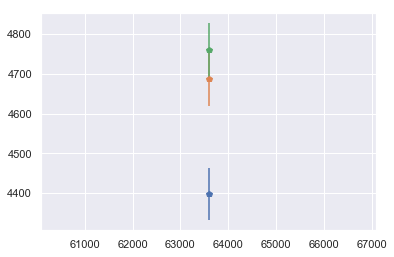

In [61]:
plt.errorbar(times, tsm.lt[25][25], np.sqrt(tsm.lt[25][25]), fmt="p")
plt.errorbar(times, tsm.lt[25][21], np.sqrt(tsm.lt[25][21]), fmt="p")
plt.errorbar(times, tsm.lt[25][22], np.sqrt(tsm.lt[25][22]), fmt="p")

<ErrorbarContainer object of 3 artists>

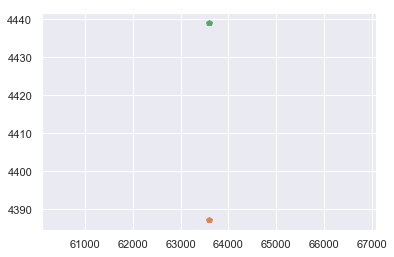

In [62]:
plt.errorbar(times, tsm.lt[30][10], np.sqrt(tsm.lt[6][10]), fmt="p")
plt.errorbar(times, tsm.lt[30][11], np.sqrt(tsm.lt[6][11]), fmt="p")
plt.errorbar(times, tsm.lt[30][12], np.sqrt(tsm.lt[6][12]), fmt="p")

### Obtain amap from tsm: The object returned is ASectorMap
```
@dataclass
class ASectorMap:  # Map in chamber sector containing average of pars
    chi2  : DataFrame
    e0    : DataFrame
    lt    : DataFrame
    e0u   : DataFrame
    ltu   : DataFrame
```
 

#### There is a single time series (ts = 0)

In [63]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [64]:
amap_average(am) 

ASectorMap(chi2=1.243150207939519, e0=10050.513487453203, lt=4370.658493014215, e0u=45.92193551683246, ltu=254.74926394363752, mapinfo=None)

#### Get rid of outlayers that distort mean and error

In [65]:
rmap = regularize_maps(am, erange=e_range, ltrange=lt_range)

2019-01-25 13:41:28,953 | INFO :  set nans to average value of interval = 9500.0


2019-01-25 13:41:29,175 | INFO :  set nans to average value of interval = 3500.0


In [66]:
amap_average(rmap)

ASectorMap(chi2=1.243150207939519, e0=10050.513487453203, lt=4366.017228964732, e0u=45.92193551683246, ltu=254.1363476063894, mapinfo=None)

In [67]:
asm = relative_errors(rmap)

In [68]:
amv = amap_average(asm)

#### Draw the maps using default colormap

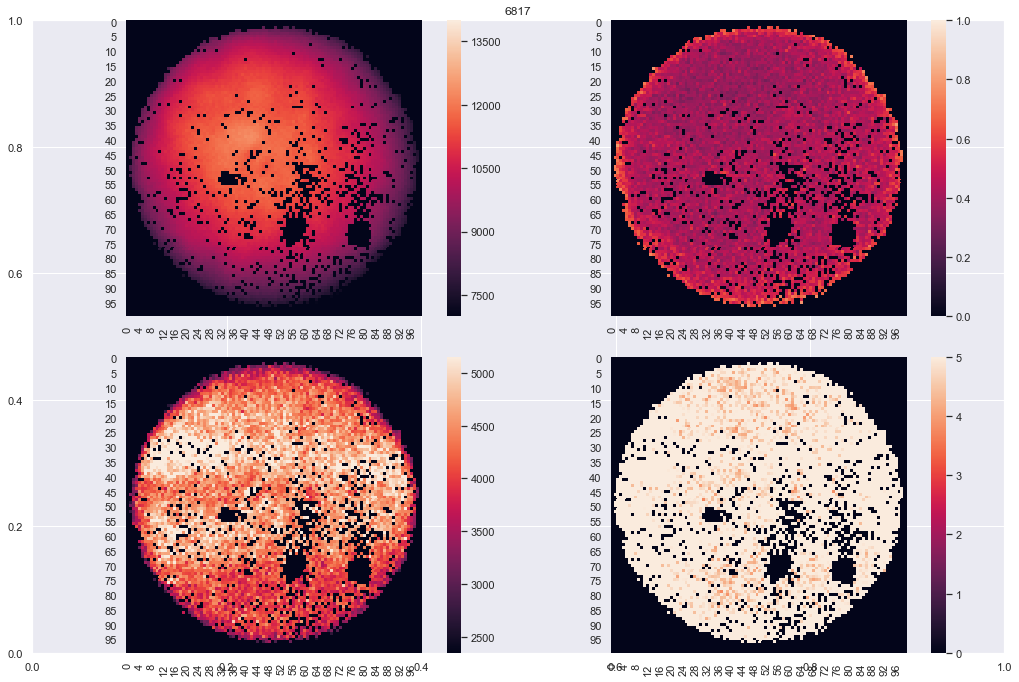

In [69]:
draw_xy_maps(asm,
            e0lims  = e0_limits,
            ltlims  = lifetime_limits,
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10),
            showPlots = False,
            plot_title = str(run_number))
plt.savefig(output_plots+'/lt_e0_xy_maps/lt_e0_xy_'+str(run_number)+'.png')
plt.savefig(summary_outputs+'maps.png')

In [70]:
asmAv = amap_replace_nan_by_mean(asm, amMean=amv)

In [71]:
amap_avg_list=amap_average(asmAv)

text_output = open(output_plots+'/text_outputs/outputs_'+str(run_number)+'.txt','w')

text_output.write('chi2='+str(amap_avg_list.chi2)+'\n')
text_output.write('e0='+str(amap_avg_list.e0)+'\n')
text_output.write('lt='+str(amap_avg_list.lt)+'\n')
text_output.write('e0u='+str(amap_avg_list.e0u)+'\n')
text_output.write('ltu='+str(amap_avg_list.ltu)+'\n')

mean = 0
num = 0

mean_low = 0
mean_high = 0

num_low = 0
num_high = 0

variance = 0
var_low = 0
var_high = 0

stdev = 0
stdev_low = 0
stdev_high = 0

zero_filled = asm.lt.fillna(0)
print(len(zero_filled))
for x in range(len(zero_filled)):
    ymax = len(zero_filled[x])
    for y in range(ymax):
        if (zero_filled[x][y] != 0):
            # get the mean
            mean += zero_filled[x][y]
            num += 1
            # get the means for low and high
            if y < ymax / 2:
                num_high += 1
                mean_high += zero_filled[x][y]
            else:
                num_low += 1
                mean_low += zero_filled[x][y]

mean /= num
mean_low /= num_low
mean_high /= num_high

for x in range(len(zero_filled)):
    ymax = len(zero_filled[x])
    for y in range(ymax):
        if (zero_filled[x][y] != 0):
            variance += (zero_filled[x][y] - mean)**2 / num
            if y < ymax / 2:
                var_high += (zero_filled[x][y] - mean_high)**2 / num_high
            else:
                var_low += (zero_filled[x][y] - mean_low)**2 / num_low
            
stdev = variance**0.5
stdev_low = var_low**0.5
stdev_high = var_high**0.5

mean_diff = (mean_high - mean_low) / mean


text_output.write('lt_mean_diff='+str(mean_diff)+'\n')
text_output.write('lt_mean_low='+str(mean_low)+'\n')
text_output.write('lt_mean_high='+str(mean_high)+'\n')
text_output.write('lt_stdev='+str(stdev)+'\n')
text_output.write('lt_stdev_low='+str(stdev_low)+'\n')
text_output.write('lt_stdev_high='+str(stdev_high)+'\n')

text_output.close()

amap_avg_list
print(asm.lt)

100


    0   1   2   3   4   5            6            7            8   \
0  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
1  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
2  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
3  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
4  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
5  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
6  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
7  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
8  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
9  NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
10 NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
11 NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
12 NaN NaN NaN NaN NaN NaN          NaN          NaN          NaN   
13 NaN NaN NaN NaN NaN NaN        

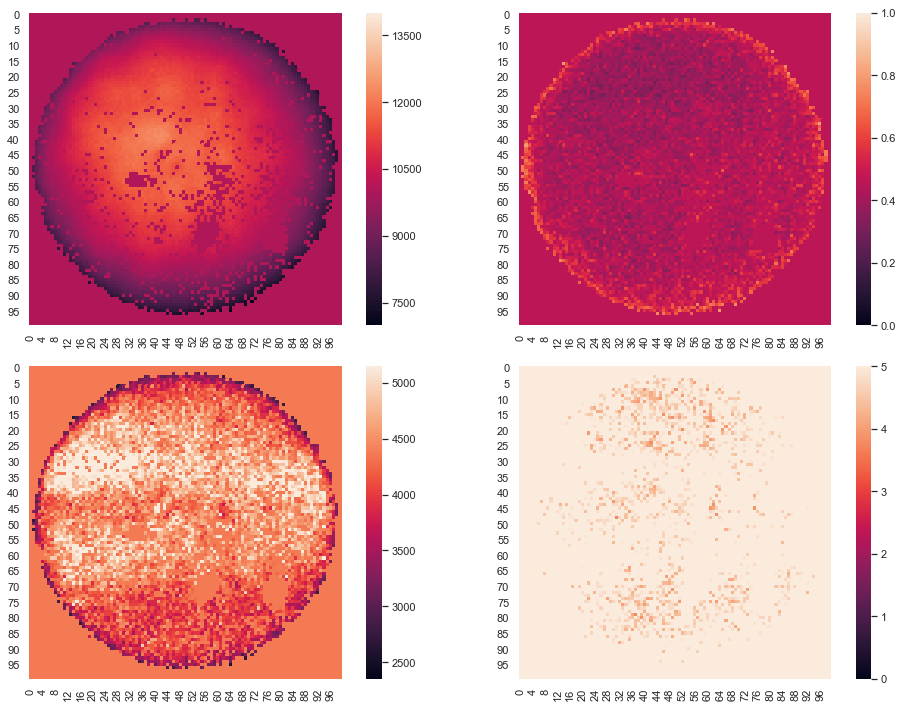

In [72]:
draw_xy_maps(asmAv,
            e0lims  = e0_limits,
            ltlims  = lifetime_limits,
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

### Save to file

In [73]:
print('The map info is:')
print(asmAv.mapinfo)
write_maps(asmAv, filename=fn.emap_file_name)

The map info is:
None


### Read back

In [74]:
emaps = read_maps(filename=fn.emap_file_name)

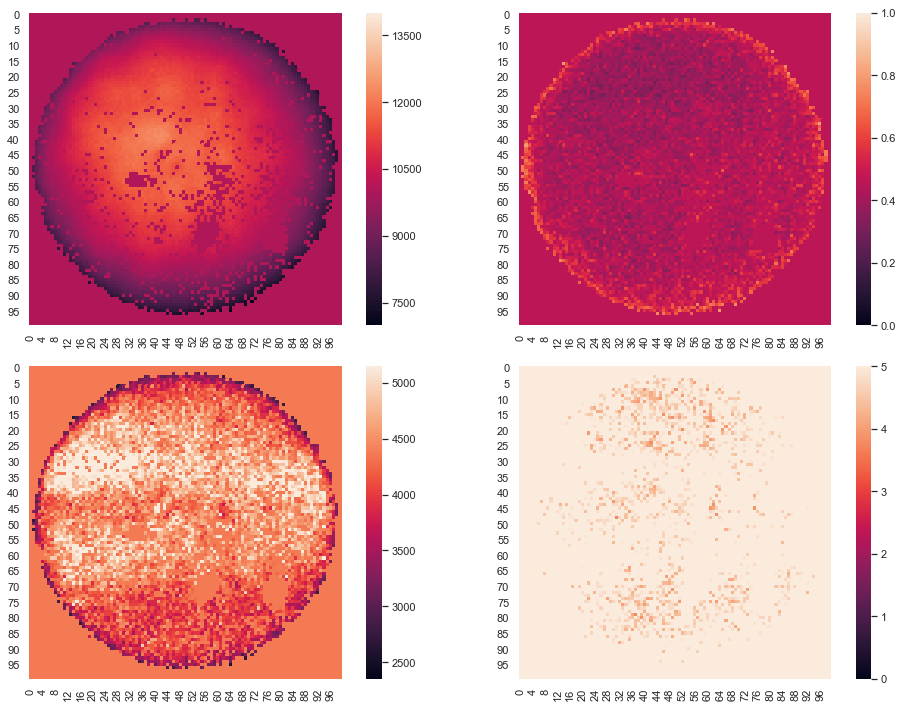

In [75]:
draw_xy_maps(emaps,
            e0lims  = e0_limits,
            ltlims  = lifetime_limits,
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

In [76]:
amap_average(emaps)

ASectorMap(chi2=1.222363979364922, e0=10194.225250569643, lt=4398.928056404111, e0u=0.4534657590976039, ltu=5.717123541581063, mapinfo=None)

In [77]:
norm = amap_max(emaps)

In [78]:
norm

ASectorMap(chi2=137.87366014773232, e0=12362.40445176145, lt=5997.892674164642, e0u=0.7952620207041411, ltu=10.313896731556087, mapinfo=None)

In [79]:
t0 = time.time()
E0 = e0_xy_correction(dst.S2e.values,
                      dst.X.values,
                      dst.Y.values,
                      E0M = emaps.e0 / norm.e0, 
                      xr  = krRanges.X,
                      yr  = krRanges.Y,
                      nx  = krNbins.X, 
                      ny  = krNbins.Y)


t1 = time.time()
print(f' e0 correction: t = {t1 -t0}')

 e0 correction: t = 14.634549856185913


In [80]:
t0 = time.time()
KRP = select_rphi_sectors(dst, DT, E0, dst.S2q, W)
t1 = time.time()
print(f' KRP: t = {t1 -t0}')

 KRP: t = 1.5434470176696777


In [81]:
neM = event_map(KRP)

In [82]:
neM

,0,1,2,3,4
0,4280,14194,23225,33142,39349
1,4467,13804,24116,34973,39557
2,4606,13594,23467,34184,38930
3,4268,13305,22371,31616,37577
4,4252,12106,21380,27538,35748
5,4375,12289,20308,30554,31855
6,4576,13627,22997,31900,32128
7,4385,12442,22690,31385,34844


In [83]:
neM[0]

0    4280
1    4467
2    4606
3    4268
4    4252
5    4375
6    4576
7    4385
Name: 0, dtype: int64

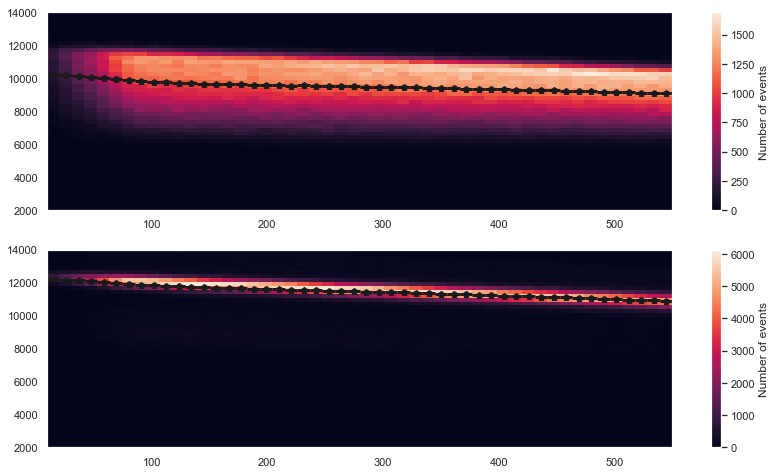

In [84]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(2, 1, 1)
nevt = h2(dst.Z, dst.S2e, 50, 50, krRanges.Z, krRanges.S2e, 
           profile=True)
ax      = fig.add_subplot(2, 1, 2)
nevt = h2(dst.Z, E0, 50, 50, krRanges.Z, krRanges.S2e, 
           profile=True)

### Now compute maps in rphi.

In [85]:
t0 = time.time()
fmap = fit_map_rphi(selection_map    = KRP,
                       event_map     = neM,
                       n_time_bins   = time_bins,
                       time_diffs     = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy         = 'S2e',
                       fit            = FitType.unbined,
                       n_min          = 100)
t1 = time.time()
print(f' fmap: t = {t1 -t0}')

 fmap: t = 5.979121923446655


In [86]:
tsm = tsmap_from_fmap(fmap)

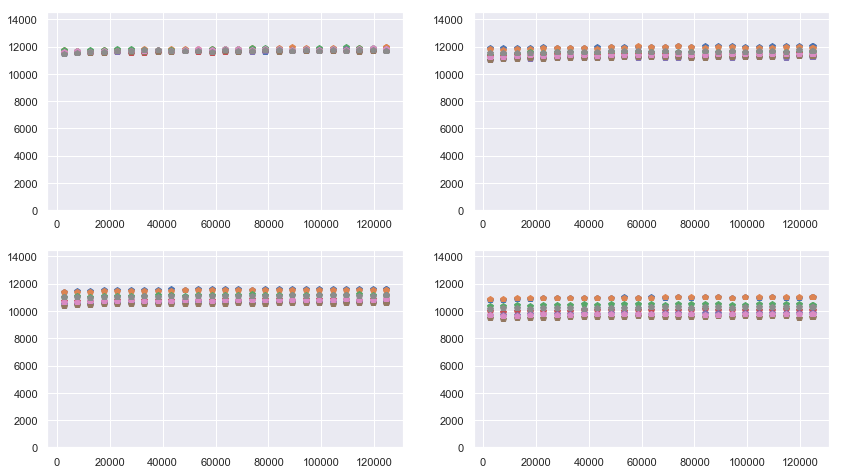

In [87]:
erange=(0, 14500)
fig = plt.figure(figsize=(14,8))
for j in range(0,4):
    ax      = fig.add_subplot(2, 2, j+1)
    plt.ylim(erange)
    for i in neM.index:
        plt.errorbar(ts, tsm.e0[j][i], np.sqrt(tsm.e0[0][i]), fmt="p")

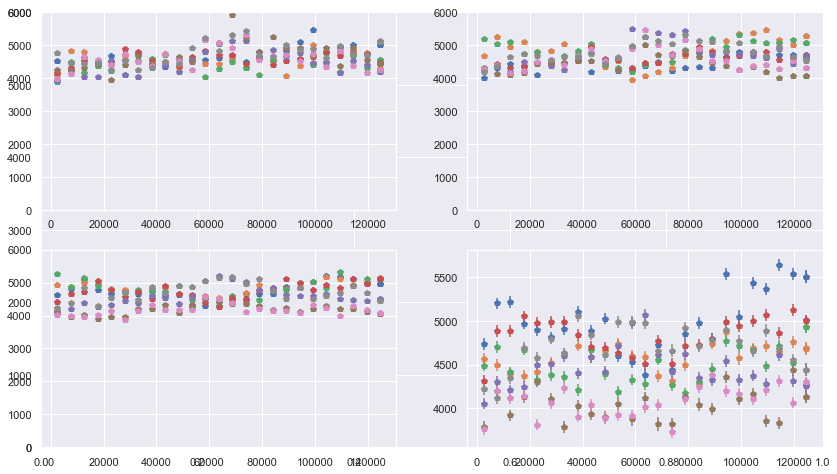

In [88]:
fig = plt.figure(figsize=(14,8))
ltrange=(0, 6000)
for j in range(0,4):
    plt.ylim(ltrange)
    ax      = fig.add_subplot(2, 2, j+1)
    for i in neM.index:
        plt.errorbar(ts, tsm.lt[j][i], np.sqrt(tsm.lt[0][i]), fmt="p")
#

In [89]:
t0 = time.time()
fmap2 = fit_map_rphi(selection_map    = KRP,
                       event_map     = neM,
                       n_time_bins   = time_bins,
                       time_diffs     = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy         = 'E',
                       fit            = FitType.unbined,
                       n_min          = 100)
t1 = time.time()
print(f' fmap: t = {t1 -t0}')

 fmap: t = 6.201421022415161


In [90]:
tsm2 = tsmap_from_fmap(fmap2)

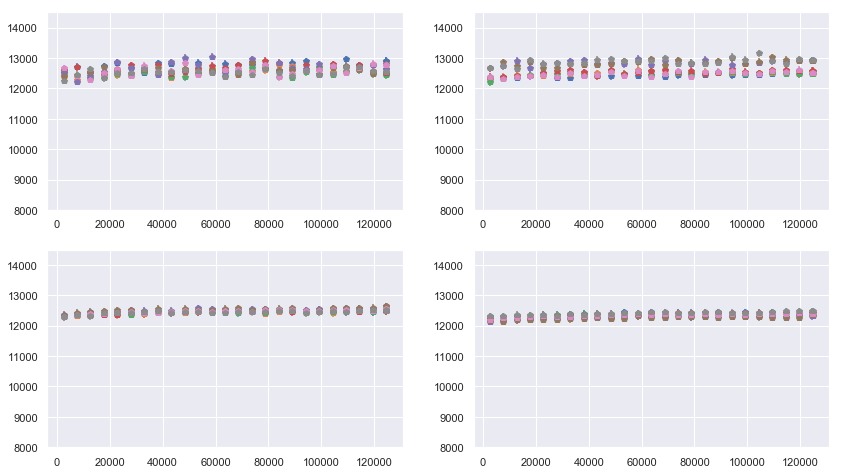

In [91]:
erange=(8000, 14500)
fig = plt.figure(figsize=(14,8))
for j in range(0,4):
    ax      = fig.add_subplot(2, 2, j+1)
    plt.ylim(erange)
    for i in neM.index:
        plt.errorbar(ts, tsm2.e0[j][i], np.sqrt(tsm2.e0[0][i]), fmt="p")

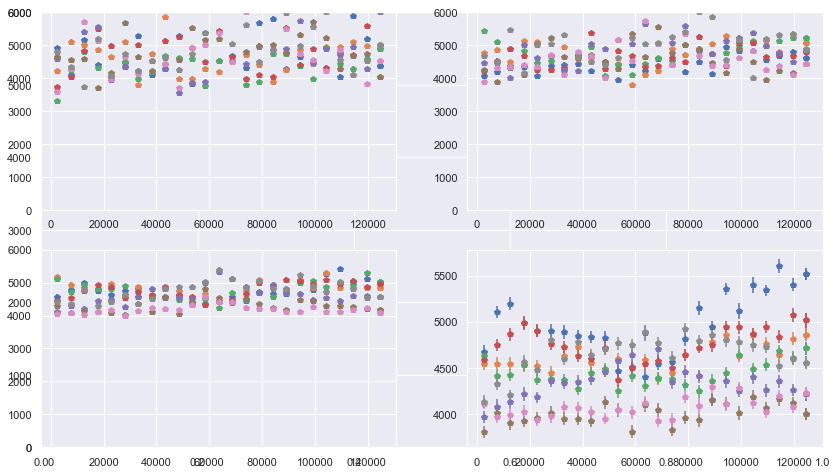

In [92]:
fig = plt.figure(figsize=(14,8))
ltrange=(0, 6000)
for j in range(0,4):
    plt.ylim(ltrange)
    ax      = fig.add_subplot(2, 2, j+1)
    for i in neM.index:
        plt.errorbar(ts, tsm2.lt[j][i], np.sqrt(tsm2.lt[0][i]), fmt="p")

In [93]:
amts0 = amap_from_tsmap(tsm2, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [94]:
avam = amap_average(amts0) 
avam

ASectorMap(chi2=1.4451616114328503, e0=12143.306313748948, lt=4977.976520311399, e0u=59.74615115116478, ltu=457.2506670692659, mapinfo=None)

In [95]:
asm0 = relative_errors(amts0)

In [96]:
amap_average(asm0) 

ASectorMap(chi2=1.4451616114328503, e0=12143.306313748948, lt=4977.976520311399, e0u=0.49305741624265664, ltu=7.487283043337547, mapinfo=None)

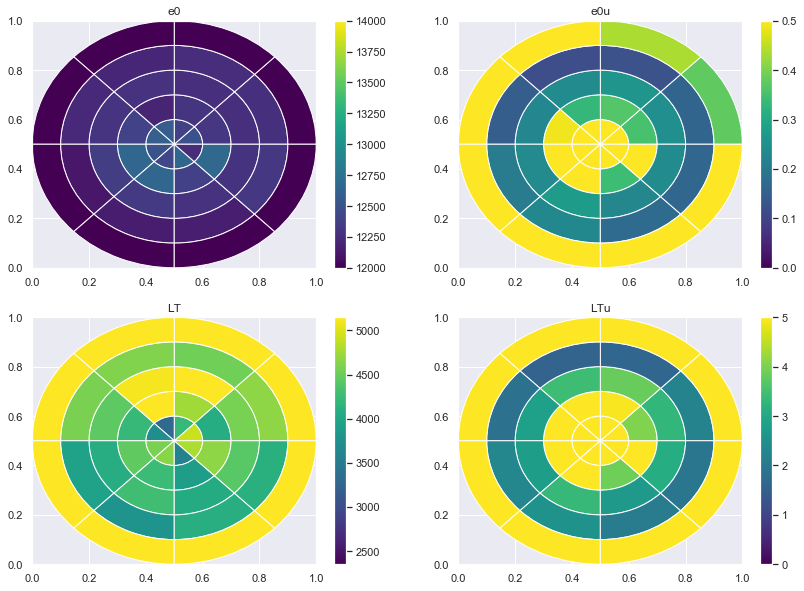

In [97]:
draw_rphi_maps(W, asm0,  
          e0lims  = e0_limits_rphi,
          ltlims  = lifetime_limits,
          eulims  = (0, 0.5),
          lulims  = (0,5),
          rmax=RMAX, 
          scale=0.5,
          alpha   = 1.0,  
          figsize=(14,10))

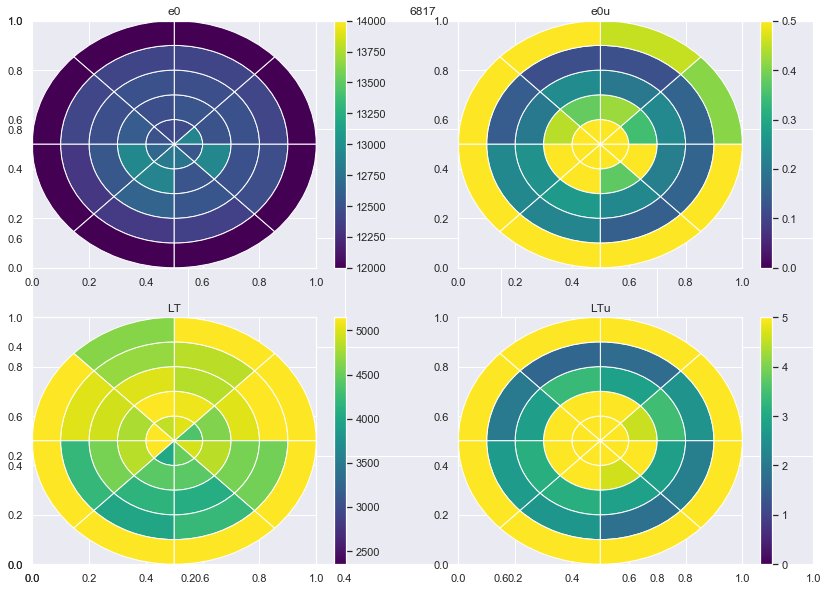

In [98]:
amts50 = amap_from_tsmap(tsm2, 
                     ts = 25, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)
asm50 = relative_errors(amts50)
amap_average(asm50) 

draw_rphi_maps(W, asm50,  
          e0lims  = e0_limits_rphi,
          ltlims  = lifetime_limits,
          eulims  = (0, 0.5),
          lulims  = (0,5),
          rmax=RMAX, 
          scale=0.5,
          alpha   = 1.0,  
          figsize=(14,10),
          showPlots = False,
          plot_title = str(run_number))
plt.savefig(output_plots+'/lt_e0_rphi_maps/lt_e0_rphi_'+str(run_number)+'.png')

### Maps for the full time series

In [99]:
aMaps = []
EE    = []
LT    = []
TT    = []
t0 = time.time()
for i, tt in enumerate(ts):
    am = amap_from_tsmap(tsm2, 
                         ts = i, 
                         range_e     = (5000, 14500),
                         range_chi2  = (0,100),
                         range_lt    = (3000,5000))
    amv = amap_average(am) 
    asm = relative_errors(am)
    av = amap_replace_nan_by_mean(asm, amMean=amv)
    av0 = amap_average(av) 
    aMaps.append(av)
    EE.append(av0.e0)
    LT.append(av0.lt)
    TT.append(tt)
t1 = time.time()
print(f' t = {t1 -t0}')

 t = 0.2951669692993164


(0, 14500)

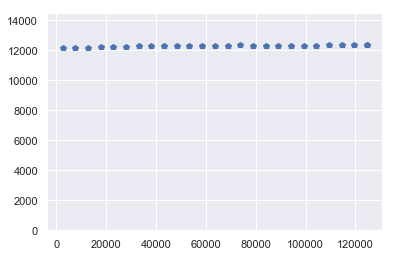

In [100]:
plt.errorbar(TT, EE, 10, fmt="p")
plt.ylim(0,14500)

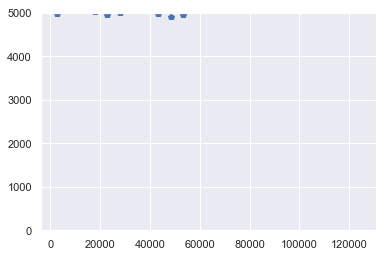

In [101]:
plt.errorbar(TT, LT, sqrt(LT), fmt="p")
plt.ylim(0,5000)
plt.savefig(summary_outputs+'AverageLT.png')

### Write maps

In [102]:
fn.map_file_name_ts

'/Volumes/NEXT_data/IC_Data//maps/kr_maps_rphi_5_8_ts_25_6817.h5'

In [103]:
write_maps_ts(aMaps, ts, filename=fn.map_file_name_ts)
time_write = time.time()

### Read maps

In [104]:
tts, tsMaps = read_maps_ts(fn.map_file_name_ts)

In [105]:
kdst = kr_event(dst, DT, E0, dst.S2q)
fr = RMAX / NSECTORS 

In [106]:
t0 = time.time()
kge =  e0_rphi_correction_ts(kdst, tts, tsMaps, fr, SPHI)     
t1 = time.time()
print(f' E0 correction: t = {t1 -t0}')

 E0 correction: t = 14.67754316329956


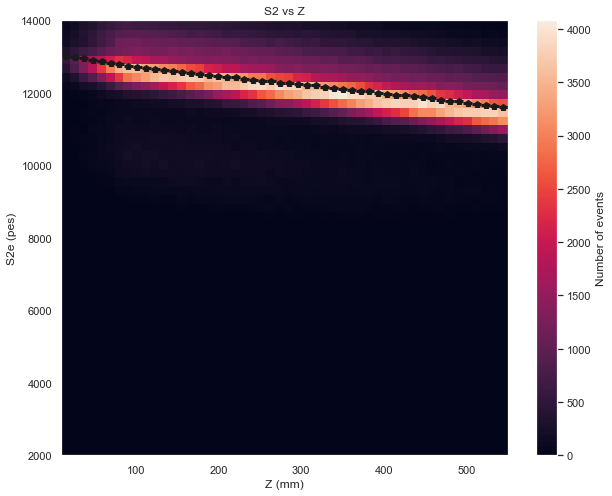

In [107]:
nevt = h2d(kge.Z, kge.E, 50, 50, krRanges.Z, krRanges.S2e, 
           pltLabels=PlotLabels(x='Z (mm)', y='S2e (pes)', title='S2 vs Z'),
           profile=True,
           figsize=(10,8))

In [108]:
t0 = time.time()
klt1 =  lt_rphi_correction_ts(kdst, tts, tsMaps, fr, SPHI)     
t1 = time.time()
print(f' LT correction: t = {t1 -t0}')

 LT correction: t = 14.052016258239746


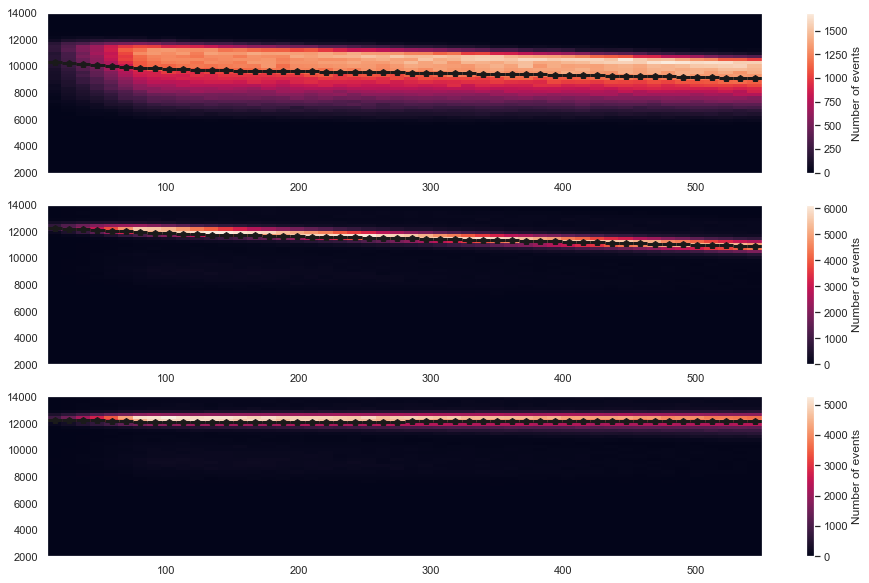

In [109]:
fig = plt.figure(figsize=(16,10))

ax      = fig.add_subplot(3, 1, 1)
nevt = h2(dst.Z, dst.S2e, 50, 50, krRanges.Z, krRanges.S2e, 
           profile=True)

ax      = fig.add_subplot(3, 1, 2)
nevt = h2(dst.Z, E0, 50, 50, krRanges.Z, krRanges.S2e, 
           profile=True)

ax      = fig.add_subplot(3, 1, 3)
nevt = h2(klt1.Z, klt1.E, 50, 50, krRanges.Z, krRanges.S2e, 
           profile=True)

plt.savefig(summary_outputs+'CorrectionLT.png')

In [110]:
t0 = time.time()
klt =  lt_rphi_correction_ts(kge, tts, tsMaps, fr, SPHI)     
t1 = time.time()
print(f' LT correction: t = {t1 -t0}')

 LT correction: t = 13.641614198684692


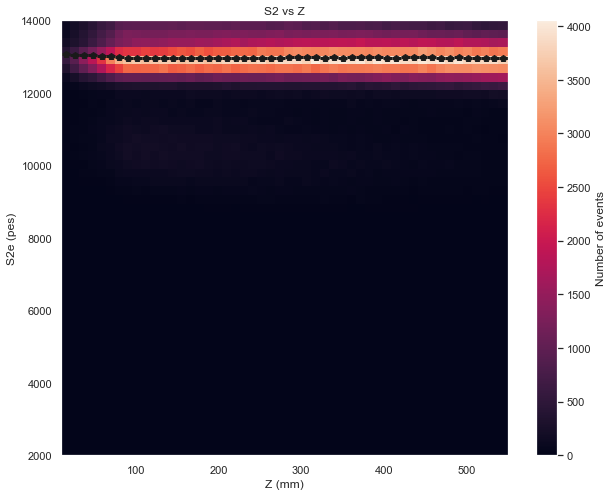

In [111]:
nevt = h2d(klt.Z, klt.E, 50, 50, krRanges.Z, krRanges.S2e, 
           pltLabels=PlotLabels(x='Z (mm)', y='S2e (pes)', title='S2 vs Z'),
           profile=True,
           figsize=(10,8))

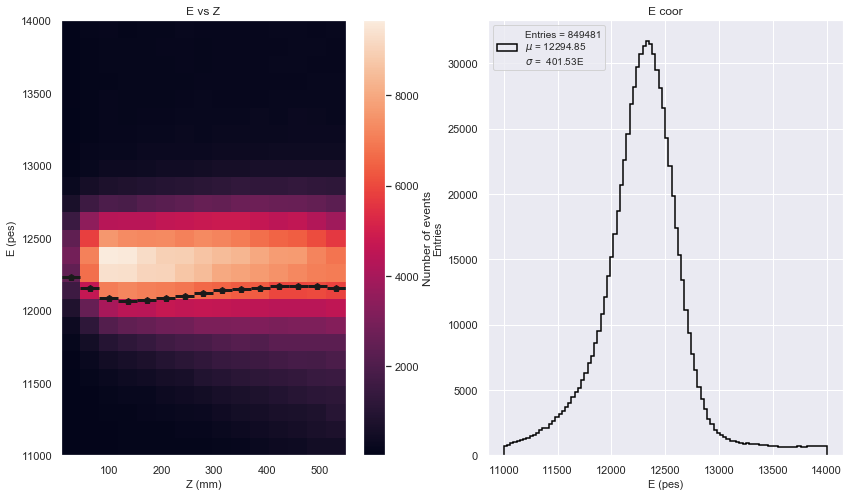

In [112]:
e_range = (11000, 14000)
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(klt1.Z, klt1.E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(klt1.E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

  Fit was valid = True
 Emu       = 12324.127466556592 +-0.5386482950972391 
 E sigma   = 271.2521726622583 +-0.4294206884088168 
 chi2    = 11.580828304799358 
 sigma E/E (FWHM)     (%) =5.172314287450411
 sigma E/E (FWHM) Qbb (%) =0.6680145090506345 


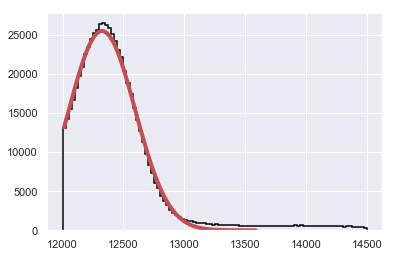

In [113]:
fc = fit_energy(klt1.E, nbins=100, range=(12000, 14500))
plot_fit_energy(fc)
print_fit_energy(fc)

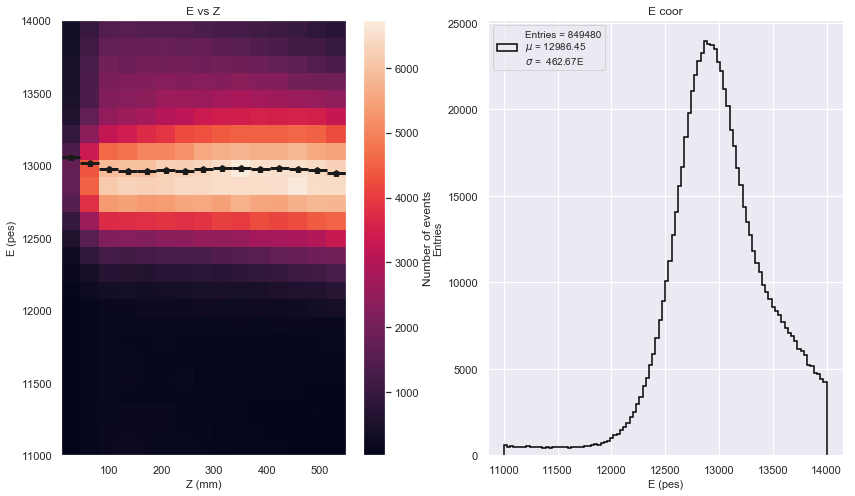

In [114]:
e_range = (11000, 14000)
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(klt.Z, klt.E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(klt.E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

  Fit was valid = True
 Emu       = 13039.523400032165 +-0.5682333318877727 
 E sigma   = 453.74005328798694 +-0.4957285343499067 
 chi2    = 22.911666958706252 
 sigma E/E (FWHM)     (%) =8.17736271882559
 sigma E/E (FWHM) Qbb (%) =1.0561223928714347 


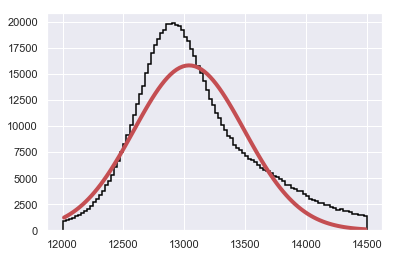

In [115]:
fc = fit_energy(klt.E, nbins=100, range=(12000, 14500))
plot_fit_energy(fc)
print_fit_energy(fc)

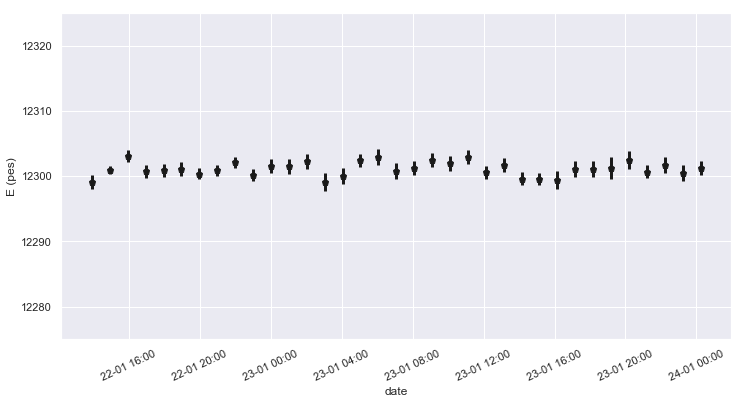

In [116]:
baseline = 12300
shift = 20
e1 = baseline - shift
e2 = baseline + shift
energy_time_profile(klt.T, klt.E, krNbins.T, krRanges.T, krTimes.timeStamps, 
                    erange=(12275, 12325),
                    figsize=(12,6))

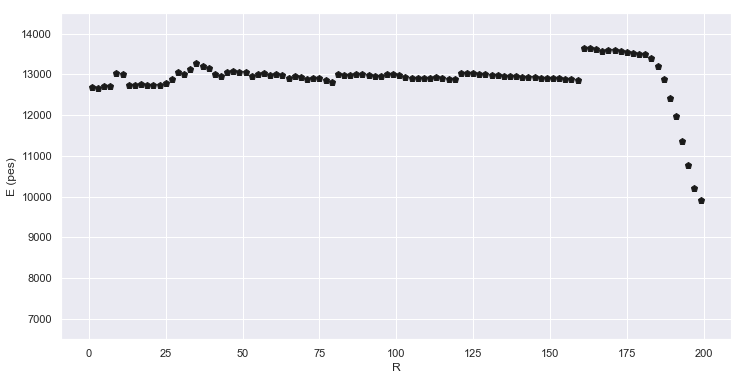

In [117]:
energy_X_profile(klt.R, klt.E, xnbins = 100, xrange=(0,200), xlabel = 'R',
                 erange=(6500, 14500),  
                 figsize=(12,6))
plt.savefig(summary_outputs+'RProfile.png')

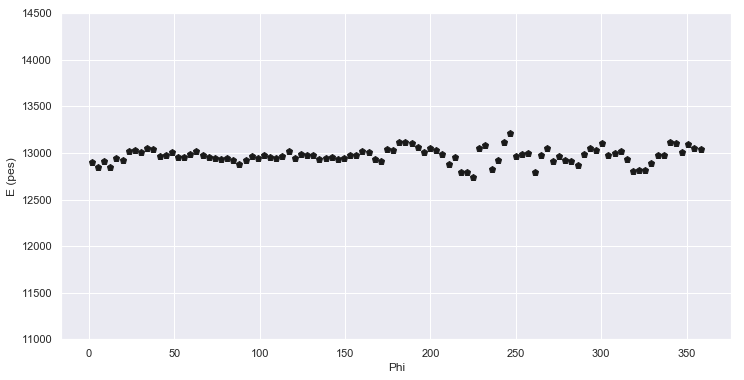

In [118]:
energy_X_profile(phirad_to_deg(klt.Phi), klt.E, xnbins = 100, xrange=(0,360), 
                 xlabel = 'Phi',
                 erange=(11000, 14500),  
                 figsize=(12,6))

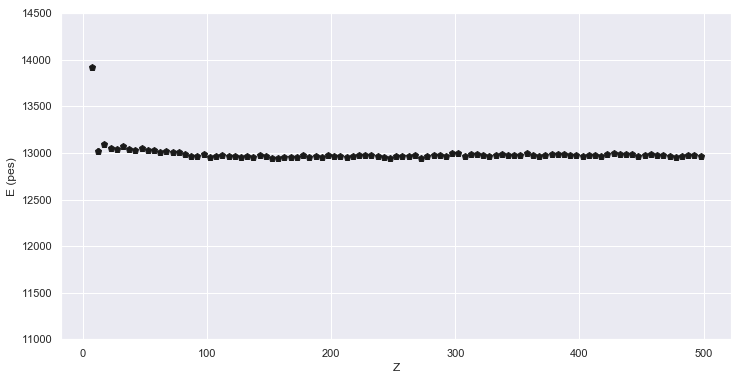

In [119]:
energy_X_profile(klt.Z, klt.E, xnbins = 100, xrange=(0,500), xlabel = 'Z',
                 erange=(11000, 14500),   
                 figsize=(12,6))

(11000, 14500)

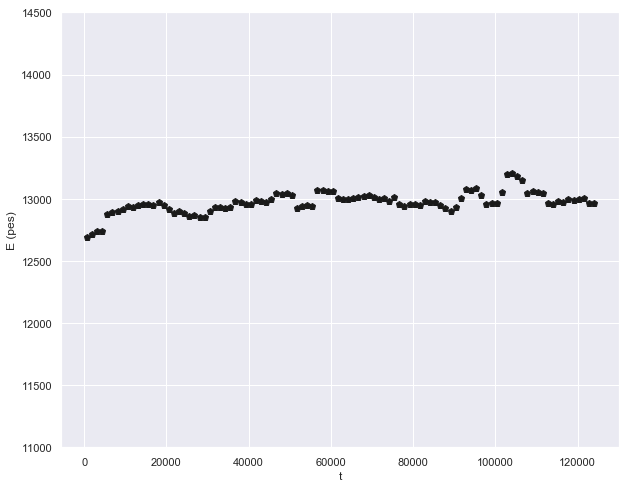

In [120]:
T   =(klt.T - klt.T.min()) 
t, e, eu = fitf.profileX(T, klt.E, 100)
erange =(11000, 14500)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
plt.errorbar(t, e, eu, fmt="kp", ms=7, lw=3)
plt.xlabel('t')
plt.ylabel('E (pes)')
plt.ylim(erange)

In [121]:
e_mu    = np.nanmean(klt.E)
print(e_mu)
e_std   = np.nanstd (klt.E)
print(e_std)

12972.972221434828
852.276977132819


In [122]:
ET_correction = corrf.Correction((t,), e, eu,
                                 norm_strategy =  "const",
                                 norm_opts     = {"value": e_mu})
Ek  = klt.E * ET_correction(T).value

(11000, 14500)

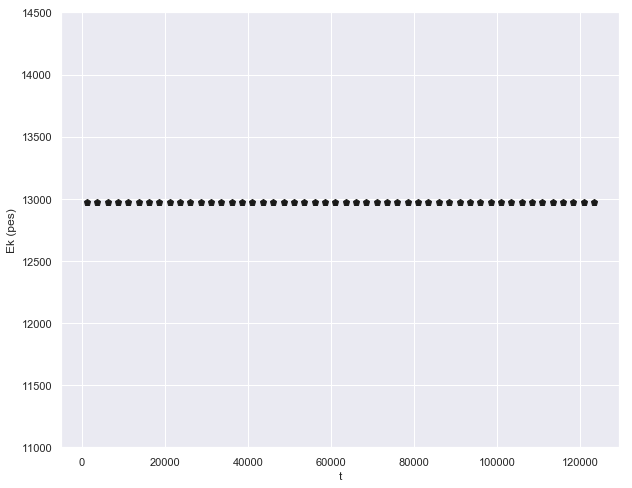

In [123]:
tc, ec, euc = fitf.profileX(T, Ek, 50)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
plt.errorbar(tc, ec, euc, fmt="kp", ms=7, lw=3)
plt.xlabel('t')
plt.ylabel('Ek (pes)')
plt.ylim(erange)

## Select events in region
- r < 180
- 10 < z < 550
- 5000 < E < 14500

In [124]:
rrange = (0, 180)

ti = timeit(lt_xy_correction)
E = ti(E0, 
       dst.X.values, 
       dst.Y.values,
       dst.Z.values, 
       LTM = emaps.lt,
       xr  = krRanges.X,
       yr  = krRanges.Y,
       nx  = krNbins.X, 
       ny  = krNbins.Y)

sel = in_range(dst.R, *rrange) & in_range(dst.Z, *z_range) &  in_range(E, *e_range)
kse = kr_event(dst, DT, E, dst.S2q, sel)  # kse = krypton selected event

Time spent in lt_xy_correction: 14.19571590423584 s


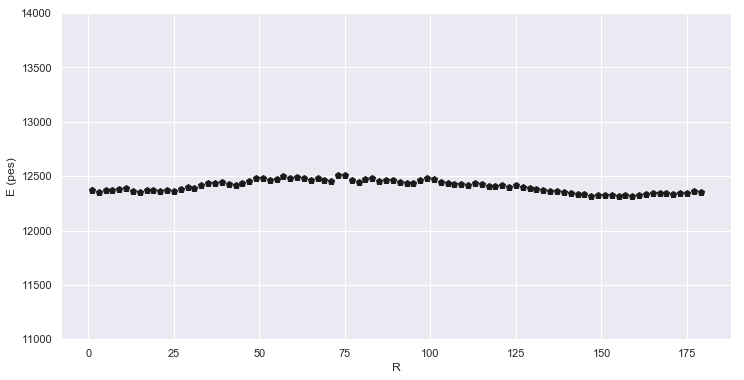

In [125]:
energy_X_profile(kse.R, kse.E, xnbins = 100, xrange=(0,200), xlabel = 'R',
                 erange=e_range,  
                 figsize=(12,6))
plt.savefig(summary_outputs+'RProfileC.png')

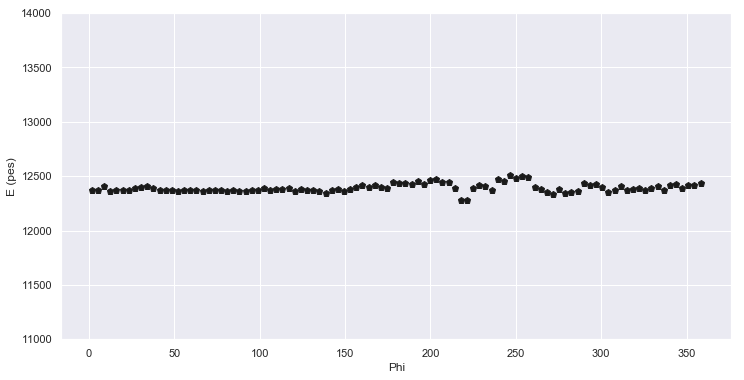

In [126]:
energy_X_profile(phirad_to_deg(kse.Phi), kse.E, xnbins = 100, xrange=(0,360), 
                 xlabel = 'Phi',
                 erange=e_range,  
                 figsize=(12,6))
plt.savefig(summary_outputs+'PhiProfile.png')

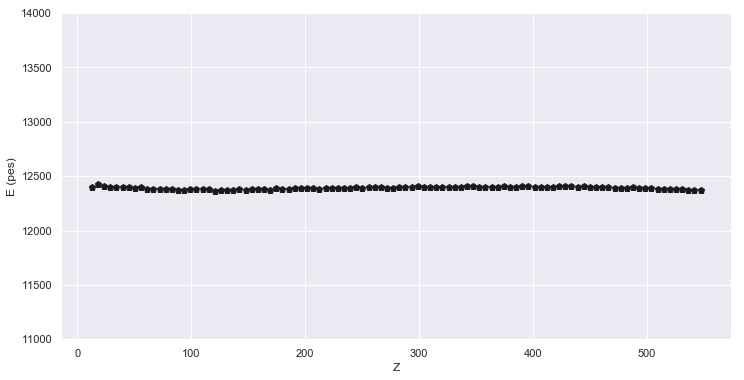

In [127]:
energy_X_profile(kse.Z, kse.E, xnbins = 100, xrange=z_range, xlabel = 'Z',
                 erange=e_range,   
                 figsize=(12,6))
plt.savefig(summary_outputs+'ZProfile.png')

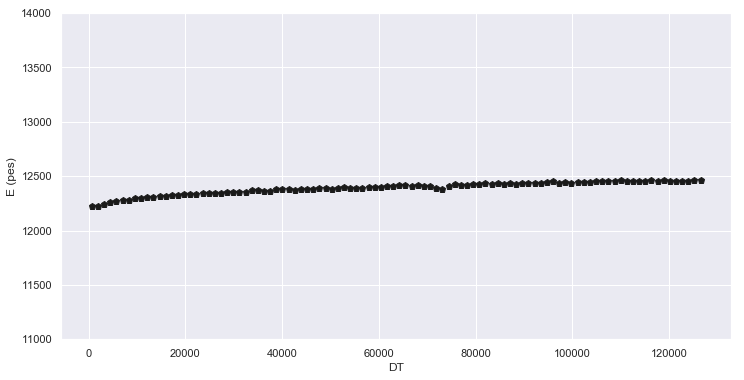

In [128]:
energy_X_profile(kse.DT, kse.E, xnbins = 100, xrange=(kse.DT[0], kse.DT[-1]), xlabel = 'DT',
                 erange=e_range,   
                 figsize=(12,6))
plt.savefig(summary_outputs+'TProfile.png')

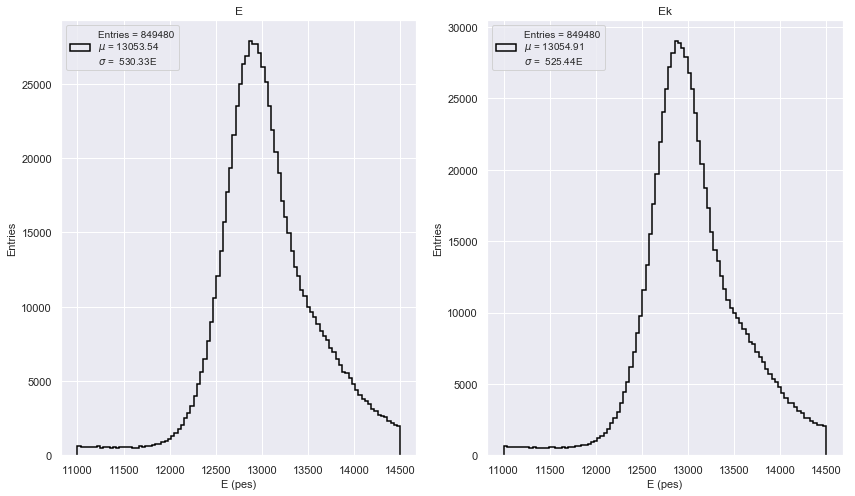

In [129]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

(_)     = h1(klt.E,  bins = 100, range =(11000,14500), stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E'), ax, legendloc='upper left')
ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(Ek,  bins = 100, range =(11000,14500), stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','Ek'), ax, legendloc='upper left')

  Fit was valid = True
 Emu       = 13037.208114152194 +-0.5550821265168614 
 E sigma   = 441.0968848232371 +-0.47995678164517774 
 chi2    = 35.409420120302734 
 sigma E/E (FWHM)     (%) =7.950917637108039
 sigma E/E (FWHM) Qbb (%) =1.0268765675631188 


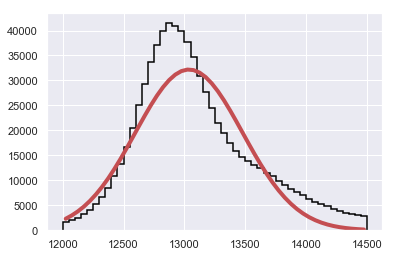

In [130]:
fc = fit_energy(Ek, nbins=50, range=(12000, 14500))
plot_fit_energy(fc)
print_fit_energy(fc)

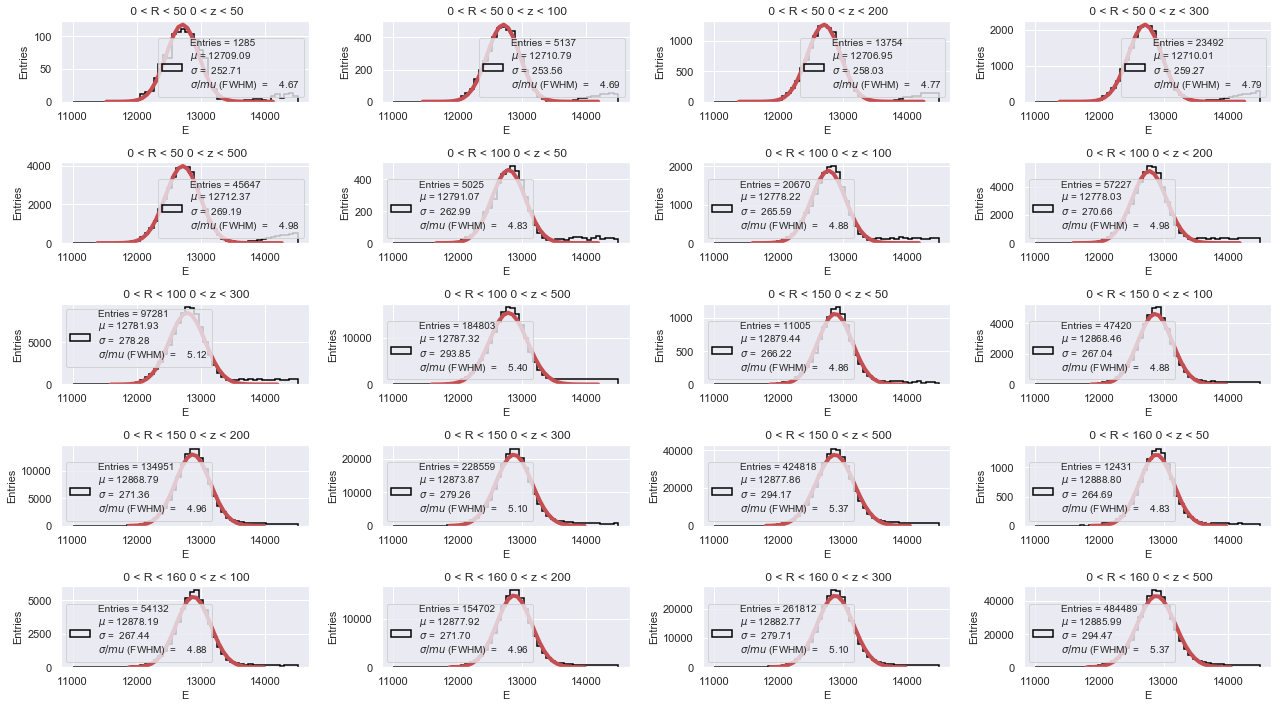

In [131]:
Ri = (50, 100,150,160)
Zi = (50, 100,200,300,500)

FC, FCE = resolution_r_z(Ri, Zi, klt.R, klt.Z, Ek,
                    enbins = 50,
                    erange = (11e+3, 14500),
                    ixy = (5,4),
                    fdraw  = True,
                    fprint = False,
                    figsize = (18,10))
plt.savefig(summary_outputs+'ResoFit.png')

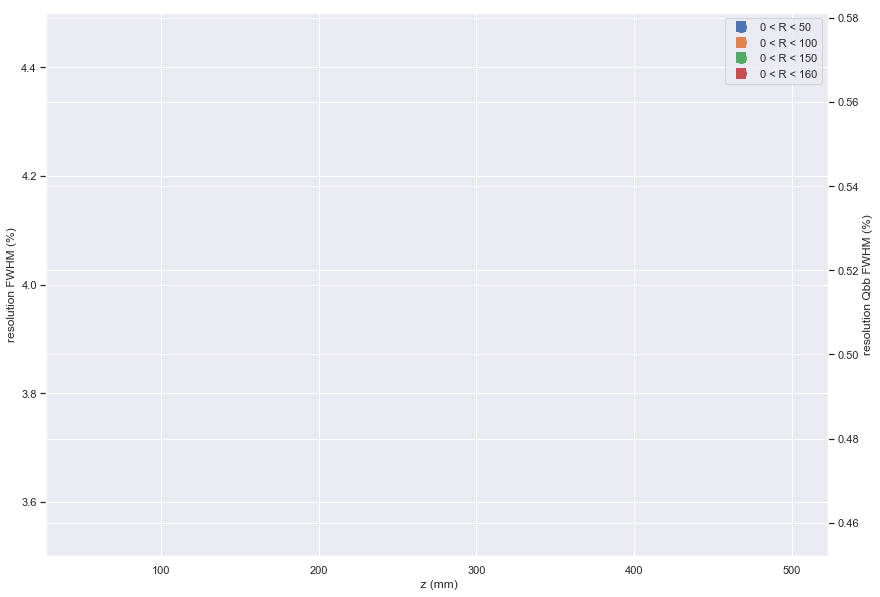

In [132]:
plot_resolution_r_z(Ri, Zi, FC, FCE)

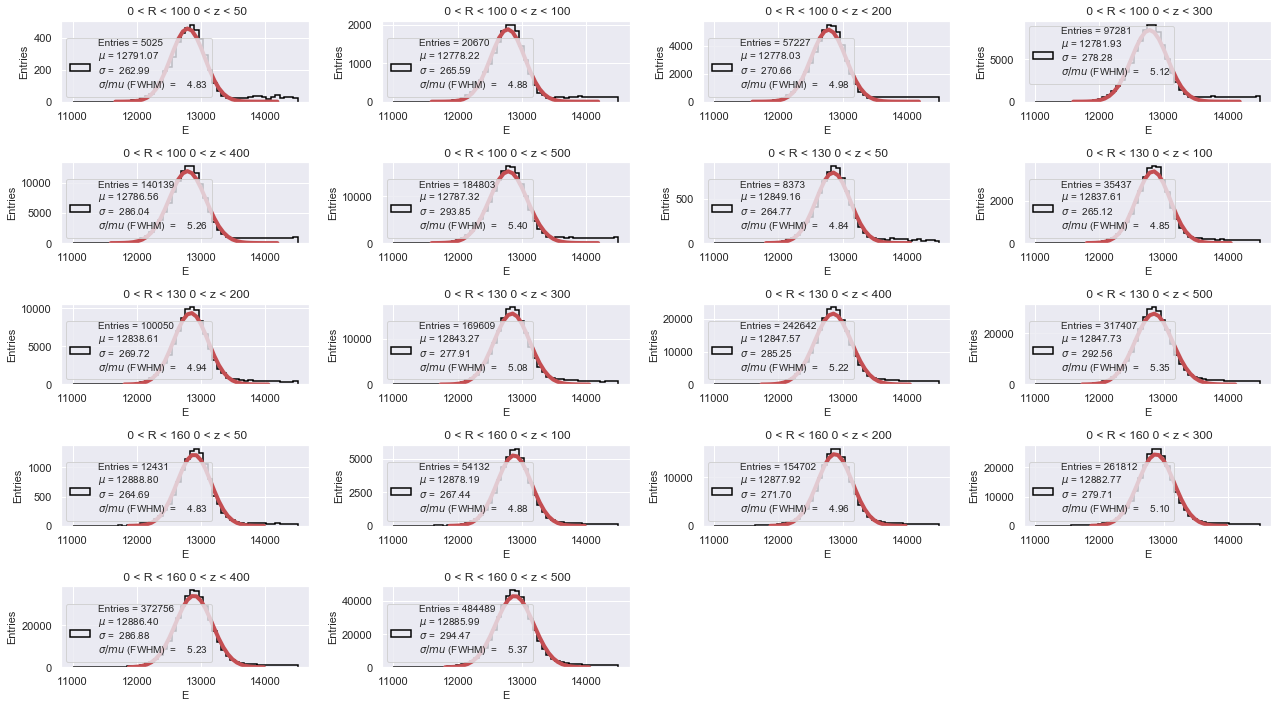

In [133]:
Ri = (100,130,160)
Zi = (50, 100,200,300,400,500)

FC, FCE = resolution_r_z(Ri, Zi, klt.R, klt.Z, Ek,
                    enbins = 50,
                    erange = (11e+3, 14500),
                    ixy = (5,4),
                    fdraw  = True,
                    fprint = False,
                    figsize = (18,10)) 

/Users/jmhaefner/miniconda/envs/IC-3.6-2018-11-07/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


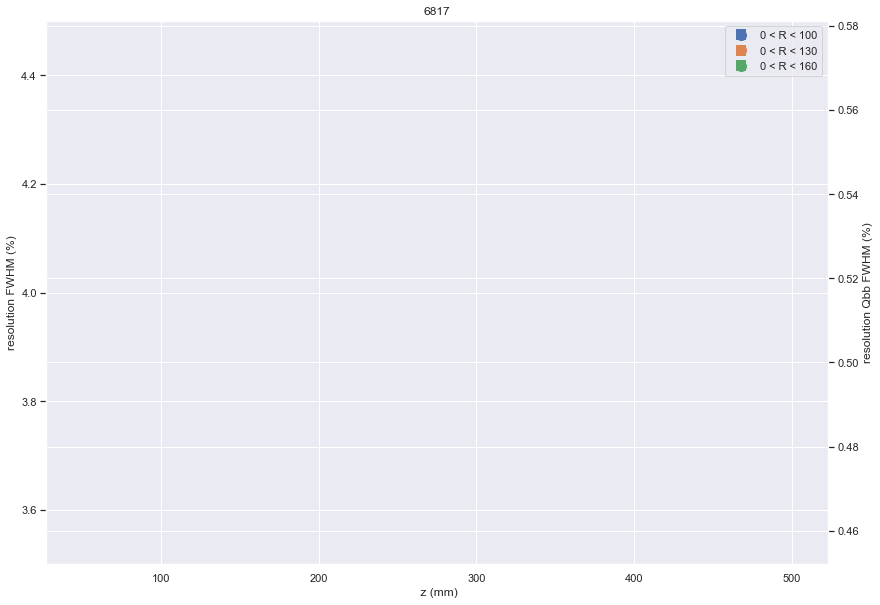

In [134]:
plot_resolution_r_z(Ri, Zi, FC, FCE, showPlots = False, plot_title=str(run_number))
plt.savefig(output_plots+'/res_vs_rz/res_vs_rz_'+str(run_number)+'.png')
plt.savefig(summary_outputs+'ResoVsZR.png')

In [135]:
dt_write = time_write - t_start
dt_plots = time.time() - time_write
print('Time to write =', round(dt_write/60.0,1), 'm')
print('Time to show plots =', round(dt_plots/60.0,1), 'm')

Time to write = 3.3 m
Time to show plots = 1.4 m
